In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',500)

<font color='blue'>Dataset was taken from kaggle (https://www.kaggle.com/sarvasaga/airbnb-singapore-listing?select=Reviews+for+Airbnb+listings.csv)</font>

<font color='blue'>It consist of 2 csv files, they are Airbnb listing.csv and Review for Airbnb listings.csv


<font color='blue'>This project is made to :
- determine the price of a listing for a new Airbnb host in Singapore.
- Make a suggestion on how to be a top Airbnb host



# I. DATA PRE-PROCESSING

## 1.Airbnb listing.csv

In [2]:
data = pd.read_csv(r"E:\8 Purwadhika Data Analysis\Final Project\Airbnb listing.csv",encoding='latin1')

C:\Users\CitraKLN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (40,41,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20190625153033,43641,COZICOMFORT LONG TERM STAY ROOM 2,NaN,This is Room No. 2.(available after Jan 15 201...,This is Room No. 2.(available after Jan 15 201...,none,NaN,NaN,NaN,NaN,NaN,No smoking indoors. Please turn off lights/fan...,NaN,NaN,https://a0.muscache.com/im/pictures/24485541/6...,NaN,266763,https://www.airbnb.com/users/show/266763,Francesca,40471.0,singapore,I am a private tutor by profession. My husband...,NaN,f,https://a0.muscache.com/im/pictures/94361977-2...,https://a0.muscache.com/im/pictures/94361977-2...,Woodlands,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Singapore, Singapore",Woodlands,Woodlands,North Region,Singapore,NaN,730702,Singapore,Singapore,SG,Singapore,1.44255,103.79580,t,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",0.0,81,NaN,1015.0,NaN,NaN,1,14,180,360,180,180,360,360,180.0,360.0,61 months ago,t,30,60,90,365,43641,0,41568.0,41568.0,94.0,10.0,10.0,10.0,10.0,8.0,8.0,f,NaN,NaN,f,f,t,t,2,0,2,0,0.01
1,50646,https://www.airbnb.com/rooms/50646,20190625153033,43641,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,"Good Condition room, bright & windy. Comes wit...",Fully furnished bedroom with a nice view on th...,none,The serenity & quiet surrounding makes it an i...,Accommodation has a queen size bed. Suitable ...,Less than 400m from the apartment is the main ...,"Kitchen, washing facilities, gym, swimming poo...",We love to host people & have the opportunity ...,'- Should be family friendly. '- Cooking is no...,NaN,NaN,https://a0.muscache.com/im/pictures/36342984/6...,NaN,227796,https://www.airbnb.com/users/show/227796,Sujatha,40429.0,"Singapore, Singapore","I am a working professional, living in Singapo...",NaN,f,https://a0.muscache.com/im/pictures/8fd2cddb-2...,https://a0.muscache.com/im/pictures/8fd2cddb-2...,Bukit Timah,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Singapore, Singapore",Bukit Timah,Bukit Timah,Central Region,Singapore,NaN,589664,Singapore,Singapore,SG,Singapore,1.33235,103.78521,t,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,80,400.0,1600.0,NaN,NaN,2,20,90,730,90,90,730,730,90.0,730.0,59 months ago,t,30,60,90,365,43641,0,41747.0,41999.0,91.0,9.0,10.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,f,t,1,0,1,0,0.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8293 entries, 0 to 8292
Data columns (total 98 columns):
id                                              8293 non-null int64
listing_url                                     8293 non-null object
scrape_id                                       8293 non-null int64
last_scraped                                    8293 non-null int64
name                                            8291 non-null object
summary                                         8033 non-null object
space                                           6136 non-null object
description                                     8141 non-null object
experiences_offered                             8293 non-null object
neighborhood_overview                           4923 non-null object
notes                                           4875 non-null object
transit                                         4995 non-null object
access                                          5257 non-null object

In [5]:
data.describe()

,id,scrape_id,last_scraped,thumbnail_url,medium_url,xl_picture_url,host_id,host_since,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.293000e+03,8.293000e+03,8293.0,0.0,0.0,0.0,8.293000e+03,8211.000000,0.0,8211.000000,8211.000000,8293.000000,8293.000000,54.000000,8293.000000,585.000000,688.000000,5863.000000,6044.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.0,8293.000000,5156.000000,5156.000000,5010.000000,5006.000000,5008.000000,5001.000000,5006.000000,5000.000000,5000.000000,8293.000000,8293.000000,8293.000000,8293.000000,5156.000000
mean,2.274277e+07,2.019063e+13,43641.0,NaN,NaN,NaN,9.337578e+07,42447.018755,NaN,45.092315,45.092315,1.313854,103.849059,145.574074,163.789220,848.042735,2924.768895,244.331059,38.071641,2.015435,15.283372,16.457977,942.153744,16.095743,16.713976,929.311709,941.396961,16.429266,938.187616,11.554685,28.139274,47.999879,210.700711,43641.0,5.256602,43006.291505,43412.672614,90.196806,9.202157,8.976038,9.493301,9.464043,9.318600,8.967000,40.363318,31.788135,7.482455,1.092729,1.042376
std,9.738889e+06,1.382896e+00,0.0,NaN,NaN,NaN,8.197011e+07,731.249904,NaN,74.312767,74.312767,0.030221,0.043449,239.554508,350.607917,890.743777,3080.848960,430.598241,42.526078,1.610761,19.927117,42.415195,1602.280564,41.996276,42.608865,1604.405530,1627.863625,42.151620,1625.271914,11.718552,23.114535,33.870549,142.581542,0.0,11.550065,524.772751,331.932276,12.335821,1.272110,1.348658,1.044033,1.078444,1.025331,1.243149,65.185396,63.143703,19.043241,5.751819,1.259012
min,4.909100e+04,2.019063e+13,43641.0,NaN,NaN,NaN,2.366600e+04,39993.000000,NaN,0.000000,0.000000,1.243870,103.646560,0.000000,0.000000,100.000000,450.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,43641.0,0.000000,40667.000000,41225.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.553309e+07,2.019063e+13,43641.0,NaN,NaN,NaN,2.333601e+07,41956.000000,NaN,2.000000,2.000000,1.295770,103.835770,0.000000,65.000000,400.000000,1350.000000,0.000000,15.000000,1.000000,0.000000,1.000000,1124.000000,1.000000,1.000000,1124.000000,1124.000000,1.000000,1124.000000,0.000000,4.000000,13.000000,63.000000,43641.0,0.000000,42632.750000,43354.750000,86.000000,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000,2.000000,0.000000,0.000000,0.000000,0.190000
50%,2.424142e+07,2.019063e+13,43641.0,NaN,NaN,NaN,6.640618e+07,42469.000000,NaN,9.000000,9.000000,1.311160,103.849950,0.000000,120.000000,600.000000,2201.000000,200.000000,30.000000,1.000000,12.000000,3.000000,1125.000000,3.000000,3.000000,1125.000000,1125.000000,3.000000,1125.000000,7.000000,24.000000,52.000000,273.000000,43641.0,0.000000,43137.000000,43567.500000,94.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.550000
75%,3.129590e+07,2.019063e+13,43641.0,NaN,NaN,NaN,1.564097e+08,43043.500000,NaN,56.000000,56.000000,1.321490,103.875930,203.750000,198.000000,1063.000000,3600.50

In [6]:
column = data.columns
dataType = []
null = []
nullPct = []
numUnique = []
uniqueSample = []
for item in column :
    dataType.append(data[item].dtype)
    null.append(data[item].isna().sum())
    nullPct.append(round((data[item].isna().sum())/(len(data[item])),2))
    uniqueSample.append(data[item].sample(2,random_state=101).values)
    numUnique.append(data[item].dropna().nunique())

datanull = pd.DataFrame({
    'dataFeatures': column,
    'dataType':dataType,
    'Number unique':numUnique,
    'null':null,
    'nullPct':nullPct,
    'uniqueSample':uniqueSample
})

datanull

,dataFeatures,dataType,Number unique,null,nullPct,uniqueSample
0,id,int64,8293,0,0.00,"[26171536, 22183984]"
1,listing_url,object,8293,0,0.00,"[https://www.airbnb.com/rooms/26171536, https:..."
2,scrape_id,int64,1,0,0.00,"[20190625153033, 20190625153033]"
3,last_scraped,int64,1,0,0.00,"[43641, 43641]"
4,name,object,7847,2,0.00,"[ââè±ªåå ¬å¯,æ´å¥ (MZ1), Home away fr..."
5,summary,object,5092,260,0.03,"[è¿éæ¯å±äºç¾é£å¤©å çä¸­å¿å°å¸¦,å..."
6,space,object,3508,2157,0.26,"[å®å ¨,èé,åå¥½ççæ´»ç¯å¢,ç»ä½ å®¶..."
7,description,object,5847,152,0.02,"[è¿éæ¯å±äºç¾é£å¤©å çä¸­å¿å°å¸¦,å..."
8,experiences_offered,object,1,0,0.00,"[none, none]"
9,neighborhood_overview,object,2377,3370,0.41,"[nan, nan]"


In [7]:
from tabulate import tabulate
print(tabulate(pd.read_excel("Columns Dataset Description.xlsx",usecols=['Columns Name','Remarks']), headers='keys', tablefmt='psql'))

+----+----------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|    | Columns Name                                 | Remarks                                                                                                                                                                                                                                                                        |
|----+----------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | id          

### Column description

|    | Columns Name                                 | Remarks                                                                                                                                                                                                                                                                        |
|----|----------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | id                                           | This column provides the listing id of the housing                                                                                                                                                                                                                             |
|  1 | <font color='red'>listing_url</font>                                  | This column provides the listing_url of the housing                                                                                                                                                                                                                            |
|  2 | <font color='red'>scrape_id</font>                                    | This columns provides the scrape id. The values on all of the columns is the same that is 20190625153033. It is the date when the data was scraped (25 June 2019 at 15:30:33)                                                                                                  |
|  3 | <font color='red'>last_scraped</font>                                 | This columns provides the date of the scraped data. It has the same values on all of the columns that is 43641. By changing excel ordinal number to datetime, the last scraped date is 25 June 2019, it has the same value as scrape_id.                                       |
|  4 | name                                         | This data is the airbnb title that aim to grab the attention of the potential guest. It usually has 50 characters (source:https://bnbduck.com/examples-of-good-airbnb-titles/)                                                                                                 |
|  5 | summary                                      | This is a required section in airbnb. Therefore, the number of null values in this dataset is low. This column provides a quick summary of the place. The maximum characters is 500 characters.                                                                                |
|  6 | space                                        | This is an optional section in airbnb.This column provides more information about the space.                                                                                                                                                                                   |
|  7 | description                                  | This is a required section in airbnb. Therefore, the number of null values in this dataset is low.                                                                                                                                                                             |
|  8 | <font color='red'>experiences_offered                          | All the value in this column is none. It means the host does not provide activities for the guest. Since, there is only one single value, this column can be neglected.                                                                                                        |
|  9 | neighborhood_overview                        | This is an optional section in airbnb.This column provides additional information about getting around the city around the nighborhood, like nearby public transportation, driving tips, or good walking routes.                                                               |
| 10 | notes                                        | This is an optional section in airbnb. This column provides additional notes for the guest.                                                                                                                                                                                    |
| 11 | transit                                      | This is an optional section in airbnb.This column provides the information about nearest transit station and how to reach it from the house.                                                                                                                                   |
| 12 | access                                       | This is an optional section in airbnb.This column provides the information about what kind of access that the guest can obtain. For example: kitchen, washing facilities, gym, swimming pool, etc.                                                                             |
| 13 | interaction                                  | This is an optional section in airbnb.This column provides the information about the interaction between the host and the guest.                                                                                                                                               |
| 14 | house_rules                                  | This is an optional section in airbnb. This column provides about the additional house rules from the host to the guest.                                                                                                                                                       |
| 15 | <font color='red'>thumbnail_url</font>                                | This is an optional section in airbnb.                                                                                                                                                                                                                                         |
| 16 | <font color='red'>medium_url</font>                                   | This is an optional section in airbnb.                                                                                                                                                                                                                                         |
| 17 | <font color='red'>picture_url</font>                                  | This is a required section in airbnb. This is the picture_url of the thumbnail.                                                                                                                                                                                                |
| 18 | <font color='red'>xl_picture_url</font>                               | This is an optional section in airbnb.                                                                                                                                                                                                                                         |
| 19 | host_id                                      | This column provides the information about the host id from airbnb.                                                                                                                                                                                                            |
| 20 | host_url                                     | This column provides the information about the host_url from airbnb that provide the information about the host, like name, address, language, type of listing, previous guest rate and review etc.                                                                            |
| 21 | host_name                                    | This column provides the information about  the host name.                                                                                                                                                                                                                     |
| 22 | host_since                                   | This column provides the information about  the date when the host first listing their house in airbnb.                                                                                                                                                                        |
| 23 | host_location                                | This column provides the information about where the host currently lives.                                                                                                                                                                                                     |
| 24 | host_about                                   | This column provides the information about how the host describe themselves.                                                                                                                                                                                                   |
| 25 | <font color='red'>host_acceptance_rate</font>                         | This column provides the information the acceptance rate of the listing. However, in this data set this has null values in all rows. Therefore it can be negelected.                                                                                                           |
| 26 | host_is_superhost                            | This column provides the information about whether the host is superhost or not. Superhosts are experienced hosts who provide a shining example for other hosts, and extraordinary experiences for their guests.                                                               |
| 27 | <font color='red'>host_thumbnail_url</font>                           | This column provides the information about  the host_thumbnail_url.                                                                                                                                                                                                            |
| 28 | <font color='red'>host_picture_url</font>                             | This column provides the information about  the host_picture_url                                                                                                                                                                                                               |
| 29 | <font color='red'>host_neighbourhood</font>                           | This column provides the information about  the neighbourhood of the listing. It is similar with column neighbourhood_cleansed. Therefore, it can be neglected.                                                                                                                                                                                                  |
| 30 | host_listings_count                          | This column provides the information about  the number of listing that owned by the host. It has the same value as in column host_total_listing_count.                                                                                                                         |
| 31 | <font color='red'>host_total_listings_count</font>                    | This column provides the information about  the number of listing that owned by the host. It has the same value as in column host_listing_count. Therefore,this column will be dropped.                                                                                        |
| 32 | host_verifications                           | This column provides the information about the type of the host verifications, like email, phone, facebook, reviews, jumio, offline_government_id, selfie, government_id, identity_manual                                                                                      |
| 33 | host_has_profile_pic                         | This column provides the information about  whether the host has profile picture or not                                                                                                                                                                                        |
| 34 | host_identity_verified                       | This column provides the information about  whether the host identity is verified or not                                                                                                                                                                                       |
| 35 | street                                       | This column provides the information about  the street of the listing.                                                                                                                                                                                                         |
| 36 | <font color='red'>neighbourhood</font>                               | This column provides the information about  the neighbourhood of the listing. It has the same value as the column 'neighbourhood_cleansed', Therefore,this column can be dropped                                                                                               |
| 37 | neighbourhood_cleansed                       | This column provides the information about  the neighbourhood of the listing. It has the same value as the column, but it has less null values compared to the 'neighbourhood_cleansed' column. Therefore this column will be used.                                            |
| 38 | neighbourhood_group_cleansed                 | This column provides the information about  the neighbourhood of the listing. It has 5 regions, Central, West, East, North-East, and North Region                                                                                                                              |
| 39 | <font color='red'>city</font>                                         | This column provides the information about  the city of the listing. This is not an important feature, since region is represented by column neighbourhood_cleansed and neighbourhood_cleansed_group.                                                                          |
| 40 | <font color='red'>state</font>                                        | This column provides the information about  the state of the listing. Since the number of null values percentage is 91%, hence it can be neglected.                                                                                                                            |
| 41 | <font color='red'>zipcode</font>                                     | This column provides the information about  the zipcode of the listing.                                                                                                                                                                                                        |
| 42 | <font color='red'>market</font>                                       | This column provides the information about  the market of the listing.                                                                                                                                                                                                         |
| 43 | <font color='red'>smart_location</font>                               | This column provides the information about  the market of the listing.  This is not an important feature.                                                                                                                                                                      |
| 44 | <font color='red'>country_code</font>                                | This column provides the information about  the country code of the listing.  This is not an important feature, since this dataset is known as Singapore airbnb dataset.                                                                                                       |
| 45 | <font color='red'>country</font>                                      | This column provides the information about  the country of the listing.   This is not an important feature, since this dataset is known as Singapore airbnb dataset.                                                                                                           |
| 46 | latitude                                     | This column provides the information about  the latitude of the listing.                                                                                                                                                                                                       |
| 47 | longitude                                    | This column provides the information about  the longitude of the listing.                                                                                                                                                                                                      |
| 48 | is_location_exact                            | This column provides the information about whether the location is exact or not. It is best not to reveal the exact address/location before a booking is made, to avoid potential problems, or in some case, scams.                                                            |
| 49 | property_type                                | This column provides the information about the property type of the listing.                                                                                                                                                                                                   |
| 50 | room_type                                    | This column provides the information about the room type of the listing. There are 3 values, they are Entire home/apt, private room, shared room.                                                                                                                              |
| 51 | bed_type                                     | This column provides the information about the bed type in the listing.                                                                                                                                                                                                        |
| 52 | amenities                                    | This column provides the information about the amenities that is provided in the listing.                                                                                                                                                                                      |
| 53 | <font color='red'>square_feet</font>                                  | This column provides the information about the area of the listing. However, in this dataset, the null values percentage is 99%. Therefore it can be neglected.                                                                                                                |
| 54 | price                                        | This column provides the information about the daily price of the listing                                                                                                                                                                                                      |
| 55 | <font color='red'>weekly_price</font>                                 | This column provides the information about the weekly price of the listing. This column is dropped, since the objective is to predict the daily price of the listing.                                                                                                          |
| 56 | <font color='red'>monthly_price</font>                                | This column provides the information about the monthly price of the listing. This column is dropped, since the objective is to predict the daily price of the listing.                                                                                                         |
| 57 | security_deposit                             | This column provides the information about the security deposit that the host asked to the guest.                                                                                                                                                                              |
| 58 | cleaning_fee                                 | This column provides the information about the cleaning fee that the host asked to the guest.                                                                                                                                                                                  |
| 59 | guests_included                              | This column provides the information about how many guests that can be added in one listing.                                                                                                                                                                                   |
| 60 | extra_people                                 | This column provides the information about how many extra people that can be added in one listing.                                                                                                                                                                             |
| 61 | minimum_nights                               | This column provides the information about the required minimum nights to rent the listing                                                                                                                                                                                     |
| 62 | maximum_nights                               | This column provides the information about the maximum nights to rent the listing                                                                                                                                                                                              |
| 63 | <font color='red'>minimum_minimum_nights</font>                       | It is an unknown feature. Therefore, it can be neglected.                                                                                                                                                                                                                      |
| 64 | <font color='red'>maximum_minimum_nights</font>                       | It is an unknown feature. Therefore, it can be neglected.                                                                                                                                                                                                                      |
| 65 | <font color='red'>minimum_maximum_nights</font>                       | It is an unknown feature. Therefore, it can be neglected.                                                                                                                                                                                                                      |
| 66 | <font color='red'>maximum_maximum_nights</font>                       | It is an unknown feature. Therefore, it can be neglected.                                                                                                                                                                                                                      |
| 67 | <font color='red'>minimum_nights_avg_ntm </font>                      | It is an unknown feature. Therefore, it can be neglected.                                                                                                                                                                                                                      |
| 68 | <font color='red'>maximum_nights_avg_ntm</font>                       | It is an unknown feature. Therefore, it can be neglected.                                                                                                                                                                                                                      |
| 69 | calendar_updated                             | This column provides the information about when the host last updated the listing.                                                                                                                                                                                             |
| 70 | has_availability                             | This column provides the information about whether the listing available or not at 29 June 2019(when the data was scraped).                                                                                                                                                    |
| 71 | availability_30                              | This column provides the information about the availibility of listing in the next 30 days since the data was scraped.                                                                                                                                                         |
| 72 | availability_60                              | This column provides the information about the availibility of listing in the next 30 days since the data was scraped.                                                                                                                                                         |
| 73 | availability_90                              | This column provides the information about the availibility of listing in the next 90 days since the data was scraped.                                                                                                                                                         |
| 74 | availability_365                             | This column provides the information about the availibility of listing in the next 365 days since the data was scraped.                                                                                                                                                        |
| 75 | <font color='red'>calendar_last_scraped</font>                        | This column provides the information about the date when the dataset was scraped.                                                                                                                                                                                              |
| 76 | number_of_reviews_ltm                        | This column provides the information about the number of reviews in the last twelve months(ltm).                                                                                                                                                                               |
| 77 | first_review                                 | This column provides the information about when the first review was submitted.                                                                                                                                                                                                |
| 78 | last_review                                  | This column provides the information about when the last review was submitted.                                                                                                                                                                                                 |
| 79 | review_scores_rating                         | This column provides the information about the overall scores rating of the listing.                                                                                                                                                                                           |
| 80 | review_scores_accuracy                       | This column provides the information about the accuracy scores rating of the listing.                                                                                                                                                                                          |
| 81 | review_scores_cleanliness                    | This column provides the information about the cleanliness scores rating of the listing.                                                                                                                                                                                       |
| 82 | review_scores_checkin                        | This column provides the information about the checkin scores rating of the listing.                                                                                                                                                                                           |
| 83 | review_scores_communication                  | This column provides the information about the communication scores rating of the listing.                                                                                                                                                                                     |
| 84 | review_scores_location                       | This column provides the information about the location scores rating of the listing.                                                                                                                                                                                          |
| 85 | review_scores_value                          | This column provides the information about the value scores rating of the listing.                                                                                                                                                                                             |
| 86 | <font color='red'>requires_license</font>                             | This column provides the information about whether the listing requires license or not. This is not an important feature, it will be dropped.                                                                                                                                  |
| 87 | <font color='red'>license</font>                                      | This column provides the information about the license name that the listing has. This is not an important feature and the null values percentage is 99%. Therefore, it will be dropped.                                                                                       |
| 88 | <font color='red'>jurisdiction_names</font>                           | This column provides the information about the jurisdiction_names name that the listing has. This is not an important feature and the null values percentage is 99%. Therefore, it will be dropped.                                                                            |
| 89 | instant_bookable                             | This column provides the information about whether the listing do not require approval from the host before they can be booked. Instead, guests can just choose their travel dates, book, and discuss check-in plans with the host.                                            |
| 90 | <font color='red'>is_business_travel_ready</font>                     | This column provides the information about whether the listing is business travel ready or not. Since all the values is false, hence this column will be neglected. Airbnb launched its Business Travel Ready program to lure professional travelers away from hotels in 2015. |
| 91 | require_guest_profile_picture                | This column provides the information about whether the listing requires guest profile picture or not.                                                                                                                                                                          |
| 92 | require_guest_phone_verification             | This column provides the information about whether the listing requires guest phone verification or not.                                                                                                                                                                       |
| 93 | calculated_host_listings_count               | This column provides the information about how many host listings in total. This is the sum of columns calculated_host_listings_count_entire_homes, calculated_host_listings_count_entire_homes, and calculated_host_listings_count_shared_rooms                               |
| 94 | calculated_host_listings_count_entire_homes  | This column provides the information about how many host listings only entire homes in total.                                                                                                                                                                                  |
| 95 | calculated_host_listings_count_private_rooms | This column provides the information about how many host listings only private rooms in total.                                                                                                                                                                                 |
| 96 | calculated_host_listings_count_shared_rooms  | This column provides the information about how many host listings only shared rooms in total.                                                                                                                                                                                  |
| 97 | reviews_per_month                            | This column provides the information about how many reviews per month that the listing has.                                                                                                                                                                                    |

<font color='blue'>Based on null data and column description, the red font columns are chosen to be dropped.</font>


In [8]:
data.drop(['listing_url','scrape_id','last_scraped','experiences_offered','thumbnail_url','medium_url','picture_url',
          'xl_picture_url','host_acceptance_rate','host_thumbnail_url','host_picture_url','host_neighbourhood','neighbourhood','host_total_listings_count',
           'city','state','zipcode','market','smart_location','country_code','country','square_feet','weekly_price','monthly_price',
          'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
          'minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_last_scraped','requires_license','license','jurisdiction_names',
          'is_business_travel_ready'],axis=1,inplace=True)

<font color='blue'>Assume column 'last_review' as the indicator of the price. If column 'last_review' has null values, then it means the listing has not been booked since the beginning. Therefore, the null values of the column 'last_review' will be dropped.</font>

<font color='blue'>Column 'review_scores_rating' is also dropped, because this is also an indication that the listing has been booked. </font>

In [9]:
data.dropna(subset=['last_review'],inplace=True)
data.reset_index(drop=True, inplace=True)

In [10]:
data[data['review_scores_rating'].isna()]

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_url,host_name,host_since,host_location,host_about,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
37,765579,Chinatown your doorstep: *Queenbed Room 021,This Room's features include: - Lockable Room ...,This Room's features include: - Lockable Room ...,This Room's features include: - Lockable Room ...,"- Apartment is at People's Park Complex, China...",MAINTENANCE - Regular cleaning of apartment's ...,"- Apartment is at People's Park Complex, China...","- 24hr checkin via door code, No curfews (but ...","- As Host manages 100 rooms in singapore, gues...",- In general please refrain from making loud n...,2413412,https://www.airbnb.com/users/show/2413412,Kaurus,41048.0,Singapore,"Managing 88 rooms of various budgets, types an...",f,103.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Singapore, Singapore",Outram,Central Region,1.28315,103.84213,t,Apartment,Private room,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Pai...",45,NaN,15.0,1,8,18,365,today,t,17,47,77,352,0,41225.0,41225.0,NaN,6.0,6.0,8.0,10.0,6.0,6.0,t,f,f,103,0,103,0,0.01
100,1756811,room in HDB sembawang close,"near mrt, air con",1 rooom for rent in HDB 4 room flat in sembawang,"near mrt, air con 1 rooom for rent in HDB 4 ro...",NaN,minimum 6 months stay,5 min to MRT sembawang,WIFI,sometimes,NaN,9238497,https://www.airbnb.com/users/show/9238497,Zhoulin,41552.0,Singapore,NaN,f,1.0,"['email', 'phone', 'facebook']",t,f,"Sembawang, Sembawang, Singapore",Sembawang,North Region,1.44843,103.81538,t,Apartment,Private room,Real Bed,"{Wifi,Elevator,Washer}",550,NaN,NaN,1,0,180,1125,48 months ago,t,30,60,90,365,0,41706.0,41706.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,1,0,1,0,0.02
223,3924672,"Sunny Room with attached bathroom,","Lovely apartment overlooking trees, set right ...",NaN,"Lovely apartment overlooking trees, set right ...",NaN,NaN,NaN,NaN,NaN,NaN,10352561,https://www.airbnb.com/users/show/10352561,Moira,41608.0,Singapore,"Professional working woman enjoys city life ,...",f,3.0,"['email', 'phone', 'reviews']",t,f,"Singapore, Singapore",Orchard,Central Region,1.30459,103.82464,t,Apartment,Private room,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Brea...",122,NaN,30.0,1,0,1,1125,8 months ago,t,28,58,84,359,1,43480.0,43480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,f,2,0,2,0,0.19
264,4318386,"Study w/ private WC, pool, central",I'm renting out a small room in a new condomin...,I'm renting out a small room in a brand new co...,I'm renting out a small room in a new condomin...,Very Central! Only a couple bus stops from Chi...,NaN,Busses at your door step.,"Pool & BBQ area, private roof top terrace.",NaN,No heavy cooking allowed due to landlords requ...,16319873,https://www.airbnb.com/users/show/16319873,Christian,41793.0,Singapore,NaN,f,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Singapore, Singapore",Bukit Merah,Central Region,1.27303,103.82783,t,Apartment,Private room,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",89,NaN,NaN,1,0,10,30,7 months ago,t,0,0,0,0,0,43154.0,43

In [11]:
data.dropna(subset=['review_scores_rating'],inplace=True)
data.reset_index(drop=True, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 63 columns):
id                                              5008 non-null int64
name                                            5007 non-null object
summary                                         4909 non-null object
space                                           4012 non-null object
description                                     4969 non-null object
neighborhood_overview                           3335 non-null object
notes                                           3155 non-null object
transit                                         3467 non-null object
access                                          3551 non-null object
interaction                                     3063 non-null object
house_rules                                     3287 non-null object
host_id                                         5008 non-null int64
host_url                                        5008 non-null objec

<font color='blue'>By dropping this column, the initial data that consist of 98 columns and 8923 rows became 63 columns and 5008 rows.</font>

In [13]:
print(f'Total {round((1-(8923-len(data))/len(data))*100,2)} % was decided to be neglected')

Total 21.83 % was decided to be neglected


### Fillna and change column type

#### 1. Fillna and change column type of ['host_since','first_review', and 'last_review'  to datetime

In [14]:
datanull[datanull['dataFeatures']=='host_since']

,dataFeatures,dataType,Number unique,null,nullPct,uniqueSample
22,host_since,float64,1677,82,0.01,"[43062.0, 43079.0]"


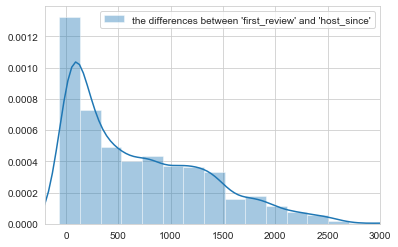

In [15]:
sns.set_style('whitegrid')
sns.distplot(data['first_review'].iloc[data['host_since'].dropna().index]-data['host_since'].dropna(),bins=20,label="the differences between 'first_review' and 'host_since'")
plt.legend()
plt.xlim(-200,3000)
plt.show()

<font color='blue'>The null value of 'host_since' was filled by using mean of the differences between column 'first_review' and column 'host_since,instead of the mode of the differences' </font>

In [16]:
data[data['host_since'].isna()]

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_url,host_name,host_since,host_location,host_about,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
161,2838555,1 Bedroom with Balcony suite (Walk to Aljunied...,- About 1 to 2minutes walk to bus stop and eat...,This is a a well renovated 1 bedroom apartment...,- About 1 to 2minutes walk to bus stop and eat...,- Bus stop : about 2 min walk - 24 hours Fairp...,Smoking is not allowed within the apartment it...,Its located 2 to 3 minutes away from the bus s...,"Guests have access to the 20 metre lap pool, g...",NaN,Please kindly note that we do not provide toil...,14521708,https://www.airbnb.com/users/show/14521708,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Singapore, Singapore, Singapore",Geylang,Central Region,1.31566,103.88590,f,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,Gym,E...",89,500.0,NaN,1,0,1,1125,today,t,0,20,50,51,16,41797.0,43604.0,95.0,10.0,10.0,10.0,10.0,9.0,9.0,f,f,f,79,79,0,0,0.83
162,2840554,Spacious 1 bedroom unit (Walk to Aljunied MRT),*SPECIAL PROMOTION* - About 3 minutes walk to ...,This is a a nicely renovated and very spacious...,*SPECIAL PROMOTION* - About 3 minutes walk to ...,- Bus stop : about 1 to 2 min walk - 24 hours ...,Please kindly note that we do not provide toil...,Its located 1 to 2 minutes away from the bus s...,"Guests have access to the 20 metre lap pool, g...",NaN,Smoking is not allowed within the apartment it...,14521708,https://www.airbnb.com/users/show/14521708,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Singapore, Singapore",Geylang,Central Region,1.31531,103.88561,f,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",93,500.0,NaN,1,0,5,365,today,t,26,56,86,87,4,41773.0,43597.0,93.0,10.0,10.0,10.0,9.0,8.0,9.0,f,f,f,79,79,0,0,0.69
176,3140972,Ground floor Cosy and Spacious 1 bedroom apart...,* SPECIAL PROMOTION * - About 1 to 2 minutes w...,This is a a well renovated and spacious 1 bedr...,* SPECIAL PROMOTION * - About 1 to 2 minutes w...,- Bus stop : about 1 to 2 min walk - 24 hours ...,Please kindly note that we do not provide toil...,Its located 1 to 2 minute walk away from the b...,"Guests have access to the 20 metre lap pool, g...",NaN,Smoking is not allowed within the apartment it...,14521708,https://www.airbnb.com/users/show/14521708,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Singapore, Singapore",Geylang,Central Region,1.31601,103.88579,f,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,Gym,E...",92,500.0,NaN,1,0,1,1125,today,t,12,37,67,68,16,41797.0,43590.0,94.0,10.0,10.0,10.0,9.0,9.0,9.0,f,f,f,79,79,0,0,0.99
181,3144267,Furnished 1 Bedroom Apartment,* SPECIAL PROMOTION* - About 1 to 2 minutes wa...,"The unit comes with a kitchenette, which allow...",* SPECIAL PROMOTION* - About 1 to 2 minutes wa...,- Bus stop : about 1 to 2 min walk - 24 hours ...,Please kindly note that we do not provide toil...,Its located 1 to 2 minutes away from the bus s...,"Guests have access to the 20 metre lap pool, g...",NaN,Smoking is not allowed within the apa

In [17]:
HostSince = []
mean_HostSince_FirstReview = (data['first_review']-data['host_since']).mean()
for i in range(len(data)):
    if data['host_since'][i] > 0 :
        HostSince.append(data['host_since'][i])
    else : 
        HostSince.append((data['first_review'][i]-mean_HostSince_FirstReview))
data['host_since']=HostSince

#### - change the format of the date, from ordinal time to python datatime

example  : from_excel_ordinal(40000) become datetime.datetime(2009, 7, 6, 0, 0)

In [18]:
# Change the excel ordinal time to python datetime
from datetime import datetime, timedelta

def from_excel_ordinal(ordinal, _epoch0=datetime(1899, 12, 31)):
    if ordinal >= 60:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    date = (_epoch0 + timedelta(days=ordinal)).replace(microsecond=0)
    return date

In [19]:
data['first_review'].iloc[1]

41747.0

In [20]:
from_excel_ordinal(data['first_review'].iloc[1])

datetime.datetime(2014, 4, 18, 0, 0)

In [21]:
data[['first_review','last_review','host_since']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 3 columns):
first_review    5008 non-null float64
last_review     5008 non-null float64
host_since      5008 non-null float64
dtypes: float64(3)
memory usage: 117.5 KB


In [22]:
data['first_review']= data['first_review'].astype(int).apply(from_excel_ordinal)
data['last_review'] = data['last_review'].astype(int).apply(from_excel_ordinal)
data['host_since'] = data['host_since'].astype(int).apply(from_excel_ordinal)

In [23]:
data[['first_review','last_review','host_since']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 3 columns):
first_review    5008 non-null datetime64[ns]
last_review     5008 non-null datetime64[ns]
host_since      5008 non-null datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 117.5 KB


#### 2. Fillna Security deposit and cleaning_fee

<font color='blue'>The null values of column 'security_deposit and 'cleaning_fee' is filled with zero. It is assumed the listing does not required cleaning fee and security deposit. </font>

In [24]:
data['cleaning_fee'].fillna(0,inplace=True)
data['security_deposit'].fillna(0,inplace=True)

#### 3. Change column 'calendar_updated' to integer that represents days ago

In [25]:
data['calendar_updated'].value_counts()

today            1776
yesterday         298
2 weeks ago       288
a week ago        268
3 weeks ago       197
4 weeks ago       181
4 months ago      136
3 months ago      131
2 months ago      124
3 days ago        119
5 weeks ago       115
5 days ago        114
4 days ago        112
2 days ago        110
7 weeks ago        74
6 weeks ago        67
7 months ago       65
5 months ago       64
6 months ago       60
9 months ago       49
10 months ago      38
11 months ago      35
8 months ago       35
19 months ago      30
6 days ago         26
21 months ago      25
15 months ago      25
22 months ago      24
24 months ago      24
18 months ago      23
1 week ago         22
23 months ago      22
29 months ago      19
13 months ago      18
28 months ago      18
26 months ago      18
30 months ago      18
36 months ago      17
25 months ago      17
12 months ago      16
31 months ago      15
17 months ago      15
14 months ago      14
20 months ago      14
27 months ago      14
16 months 

In [26]:
data[data['calendar_updated'] == 'never']

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_url,host_name,host_since,host_location,host_about,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
415,5672124,Budget rooms very near Mrt - WEST,Rooms are very small. Fit single bed ONLY. Com...,Private Room with Private Toilet,Rooms are very small. Fit single bed ONLY. Com...,Near Lakeside MRT - 5 mins,NaN,NaN,All common areas are shared,Via (Hidden by Airbnb) . No host staying,NaN,228867,https://www.airbnb.com/users/show/228867,Champ,2010-09-08,"Singapore, Singapore","Simple. Hosting Students , professional as wel...",f,5.0,"['email', 'phone', 'reviews']",t,f,"Singapore, Singapore, Singapore",Jurong West,West Region,1.34188,103.71841,f,Condominium,Private room,Real Bed,"{Internet,Wifi,Kitchen,Heating,Washer,""Host gr...",30,200.0,20.0,1,0,90,1125,never,t,30,60,90,365,0,2015-05-29,2015-08-14,60.0,9.0,7.0,7.0,10.0,10.0,6.0,f,f,f,5,0,5,0,0.04
930,9811834,è±æå±±é£æ¯åºèéè¶ å¤§ä¸»äººæ¿é´ç¬ç...,"ç»¿æ èçç¯ç»èéé«æ¡£å ¬å¯,è·ç¦»å£...",æ°å å¡å¸åºæå¤§çç­å¸¦å ¬å­å±±ä¸,"ç»¿æ èçç¯ç»èéé«æ¡£å ¬å¯,è·ç¦»å£...",NaN,NaN,NaN,å®¢å ï½¤å¨æ¿,NaN,NaN,47160455,https://www.airbnb.com/users/show/47160455,Lin,2015-10-22,SG,NaN,f,1.0,"['email', 'phone', 'reviews']",t,f,"Singapore, SINGAPORE, Singapore",Bukit Merah,Central Region,1.28025,103.82337,f,Apartment,Private room,Real Bed,{},89,0.0,0.0,1,0,90,365,never,t,29,59,89,364,0,2016-02-08,2016-02-08,60.0,6.0,6.0,10.0,10.0,8.0,6.0,t,f,f,1,0,1,0,0.02
1432,14524929,Newly renovated Queen room,Newly renovated tastefully decorated room in a...,Newly renovated & tastefully furnish just like...,Newly renovated tastefully decorated room in a...,Famous Serangoon garden nearby with lots of F&...,NaN,Bus stop is just outside the house. MRT statio...,Rooftop alfresco chill out areas with swimming...,Can call or text me as & when needed,"Kindly ensure that that the lights, fan & airc...",29295816,https://www.airbnb.com/users/show/29295816,Jojo,2015-03-13,Singapore,NaN,f,5.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Singapore, Singapore, Singapore",Hougang,North-East Region,1.36667,103.87627,f,House,Private room,Real Bed,"{Wifi,""Air conditioning"",""Wheelchair accessibl...",97,200.0,20.0,1,25,5,1125,never,t,28,58,88,363,0,2017-01-19,2017-01-19,80.0,8.0,10.0,10.0,8.0,6.0,10.0,f,f,f,5,0,5,0,0.03
1487,14989813,Common Room in Vista Residencies,"Luxury condominium with swimming pool, gym,ten...",NaN,"Luxury condominium with swimming pool, gym,ten...",NaN,NaN,NaN,NaN,NaN,NaN,91064876,https://www.airbnb.com/users/show/91064876,Tom,2016-08-21,"Singapore, Singapore",NaN,f,8.0,"['email', 'phone', 'reviews']",t,f,"Whampoa, æ°å å¡, Singapore",Novena,Central Region,1.32788,103.84296,f,Apartment,Private room,Real Bed,"{Wifi,""Air conditioning"",Pool,Kitchen,Gym,Washer}",70,0.0,0.0,1,0,90,1125,never,t,29,59,89,364,0,2016-12-10,2016-12-10,100.0,8.0,8.0,8.0,10.0,8.0,10.0,f,f,f,8,0,8,0,0.03
1599,15809023,æ°å å¡ä¸­å¿åºå+äº¤éä¾¿å©+å± ä½èé...,"ç´«çº¿å°éå é(woodleigh)ç«éè¿,åå± å...","æ¿å­

<font color='blue'>Change the value never.</font>

<font color='blue'>Assume the meaning of 'never' is that the calendar have not been updated since the beginning. Then

calendar_updated (days) = date of scraped - host since
</font>

In [27]:
scraped_date = datetime.strptime("2019-06-25 00:00:00", "%Y-%m-%d %H:%M:%S")
for i in data[data['calendar_updated'] == 'never'].index :
    data['calendar_updated'].iloc[i] = (f"{(scraped_date - data['host_since'].iloc[i]).days} days")

C:\Users\CitraKLN\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [28]:
calendarUpdated = []
for i in range(len(data)):
    x = data['calendar_updated'].iloc[i].split()
    if 'months' in x:
        calendarUpdated.append(int(x[0])*30)
    if 'weeks' in x:
        calendarUpdated.append(int(x[0])*7)
    elif 'week' in x:
        calendarUpdated.append(int(7))
    elif 'days' in x:
        calendarUpdated.append(int(x[0]))
    elif 'yesterday' in x:
        calendarUpdated.append(int(1))
    elif 'today' in x:
        calendarUpdated.append(int(1))

data['calendar_updated']=calendarUpdated                                        
                                        

In [29]:
data['calendar_updated'].value_counts()

1       2074
7        290
14       288
21       197
28       181
120      136
90       131
60       124
3        119
35       115
5        114
4        112
2        110
49        74
42        67
210       65
150       64
180       60
270       49
300       38
240       35
330       35
570       30
6         26
630       25
450       25
720       24
660       24
540       23
690       22
870       19
390       18
900       18
840       18
780       18
750       17
1080      17
360       16
930       15
510       15
810       14
600       14
420       14
480       13
1050      10
990        9
960        9
1110       8
1260       8
1020       7
1350       6
1140       5
1230       5
1200       4
1380       4
1440       4
1290       4
1170       4
1680       3
1410       3
1470       2
3212       2
1830       1
1770       1
1800       1
964        1
1320       1
1342       1
1038       1
1565       1
Name: calendar_updated, dtype: int64

#### 4. Fillna the column 'host_is_superhost'

<font color='blue'>All of the listings that have null value of column 'host_is_superhost' have the value of last_review. It means the listing has ever been booked, but the host is not superhost. Therefore the nan value can be filled with false. </font>

In [30]:
data['host_is_superhost'].value_counts()

f    3979
t     949
Name: host_is_superhost, dtype: int64

In [31]:
data['host_is_superhost'].fillna('f',inplace=True)
data['host_is_superhost'].value_counts()

f    4059
t     949
Name: host_is_superhost, dtype: int64

In [32]:
data['host_is_superhost'] = data['host_is_superhost'].map({
    't':1,
    'f':0
})

#### 5. Fillna the column 'host_listings_count'

<font color='blue'>Some columns 'host_listings_count' has the same value as column 'calculated_host_listings_count' and some have different values. 
    
However, after opening some samples from listing_id, it can be seen that column 'host_listings_count' is more reliable than column 'calculated_host_listings_count'. 
    
Therefore, in this prediction, column 'host_listings_count' will be used. The null values of this column will be filled based on column 'calculated_host_listings_count'.    </font>

In [33]:
data[data['host_listings_count'].isna()]

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_url,host_name,host_since,host_location,host_about,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
161,2838555,1 Bedroom with Balcony suite (Walk to Aljunied...,- About 1 to 2minutes walk to bus stop and eat...,This is a a well renovated 1 bedroom apartment...,- About 1 to 2minutes walk to bus stop and eat...,- Bus stop : about 2 min walk - 24 hours Fairp...,Smoking is not allowed within the apartment it...,Its located 2 to 3 minutes away from the bus s...,"Guests have access to the 20 metre lap pool, g...",NaN,Please kindly note that we do not provide toil...,14521708,https://www.airbnb.com/users/show/14521708,NaN,2012-07-10,NaN,NaN,0,NaN,None,NaN,NaN,"Singapore, Singapore, Singapore",Geylang,Central Region,1.31566,103.88590,f,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,Gym,E...",89,500.0,0.0,1,0,1,1125,1,t,0,20,50,51,16,2014-06-07,2019-05-19,95.0,10.0,10.0,10.0,10.0,9.0,9.0,f,f,f,79,79,0,0,0.83
162,2840554,Spacious 1 bedroom unit (Walk to Aljunied MRT),*SPECIAL PROMOTION* - About 3 minutes walk to ...,This is a a nicely renovated and very spacious...,*SPECIAL PROMOTION* - About 3 minutes walk to ...,- Bus stop : about 1 to 2 min walk - 24 hours ...,Please kindly note that we do not provide toil...,Its located 1 to 2 minutes away from the bus s...,"Guests have access to the 20 metre lap pool, g...",NaN,Smoking is not allowed within the apartment it...,14521708,https://www.airbnb.com/users/show/14521708,NaN,2012-06-16,NaN,NaN,0,NaN,None,NaN,NaN,"Singapore, Singapore",Geylang,Central Region,1.31531,103.88561,f,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",93,500.0,0.0,1,0,5,365,1,t,26,56,86,87,4,2014-05-14,2019-05-12,93.0,10.0,10.0,10.0,9.0,8.0,9.0,f,f,f,79,79,0,0,0.69
176,3140972,Ground floor Cosy and Spacious 1 bedroom apart...,* SPECIAL PROMOTION * - About 1 to 2 minutes w...,This is a a well renovated and spacious 1 bedr...,* SPECIAL PROMOTION * - About 1 to 2 minutes w...,- Bus stop : about 1 to 2 min walk - 24 hours ...,Please kindly note that we do not provide toil...,Its located 1 to 2 minute walk away from the b...,"Guests have access to the 20 metre lap pool, g...",NaN,Smoking is not allowed within the apartment it...,14521708,https://www.airbnb.com/users/show/14521708,NaN,2012-07-10,NaN,NaN,0,NaN,None,NaN,NaN,"Singapore, Singapore",Geylang,Central Region,1.31601,103.88579,f,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,Gym,E...",92,500.0,0.0,1,0,1,1125,1,t,12,37,67,68,16,2014-06-07,2019-05-05,94.0,10.0,10.0,10.0,9.0,9.0,9.0,f,f,f,79,79,0,0,0.99
181,3144267,Furnished 1 Bedroom Apartment,* SPECIAL PROMOTION* - About 1 to 2 minutes wa...,"The unit comes with a kitchenette, which allow...",* SPECIAL PROMOTION* - About 1 to 2 minutes wa...,- Bus stop : about 1 to 2 min walk - 24 hours ...,Please kindly note that we do not provide toil...,Its located 1 to 2 minutes away from the bus s...,"Guests have access to the 20 metre lap pool, g...",NaN,Smoking is not a

In [34]:
data[['host_listings_count','calculated_host_listings_count']].sample(10)

,host_listings_count,calculated_host_listings_count
4733,6.0,6
1291,5.0,5
1126,28.0,27
2609,86.0,85
2891,1.0,1
2359,1.0,1
411,30.0,30
323,30.0,30
2249,11.0,10
3419,4.0,4


In [35]:
hostListingsCount = []
for i in range(len(data)) :
    if data['host_listings_count'].iloc[i]>0:
        hostListingsCount.append(data['host_listings_count'].iloc[i])
    else : 
        hostListingsCount.append(data['calculated_host_listings_count'].iloc[i])
data['host_listings_count']=hostListingsCount

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 63 columns):
id                                              5008 non-null int64
name                                            5007 non-null object
summary                                         4909 non-null object
space                                           4012 non-null object
description                                     4969 non-null object
neighborhood_overview                           3335 non-null object
notes                                           3155 non-null object
transit                                         3467 non-null object
access                                          3551 non-null object
interaction                                     3063 non-null object
house_rules                                     3287 non-null object
host_id                                         5008 non-null int64
host_url                                        5008 non-null objec

## 2. Reviews for Airbnb listings.csv

In [37]:
data2 = pd.read_csv('Reviews for Airbnb listings.csv')
data2.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,49091,8243238,21/10/2013,8557223,Jared,Fran was absolutely gracious and welcoming. Ma...
1,50646,11909864,18/4/2014,1356099,James,A comfortable room in a smart condo developmen...
2,50646,13823948,5/6/2014,15222393,Welli,Stayed over at Sujatha's house for 3 good nigh...
3,50646,15117222,2/7/2014,5543172,Cyril,It's been a lovely stay at Sujatha's. The room...
4,50646,15426462,8/7/2014,817532,Jake,"We had a great experience. A nice place, an am..."


In [38]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100919 entries, 0 to 100918
Data columns (total 6 columns):
listing_id       100919 non-null int64
id               100919 non-null int64
date             100919 non-null object
reviewer_id      100919 non-null int64
reviewer_name    100916 non-null object
comments         100842 non-null object
dtypes: int64(3), object(3)
memory usage: 4.6+ MB


In [39]:
review_groupby =  data2.groupby('listing_id', as_index=False).agg(lambda x: x.tolist())
review_groupby = review_groupby.rename({'id': 'id_2'}, axis=1)  
review_groupby

,listing_id,id_2,date,reviewer_id,reviewer_name,comments
0,49091,[8243238],[21/10/2013],[8557223],[Jared],[Fran was absolutely gracious and welcoming. M...
1,50646,"[11909864, 13823948, 15117222, 15426462, 15552...","[18/4/2014, 5/6/2014, 2/7/2014, 8/7/2014, 11/7...","[1356099, 15222393, 5543172, 817532, 10942382,...","[James, Welli, Cyril, Jake, Subba, Claire, Han...",[A comfortable room in a smart condo developme...
2,56334,"[333890, 352553, 358719, 603762, 3423462, 3500...","[25/6/2011, 4/7/2011, 7/7/2011, 6/10/2011, 27/...","[699082, 729695, 91474, 949724, 4330782, 45921...","[Md Hadi Shafie, Camas, Jeanne, Hayley, Trini,...",[Fran is an excellent host who provided everyt...
3,71609,"[793880, 1731810, 2162194, 2190615, 3221837, 1...","[19/12/2011, 17/7/2012, 1/9/2012, 4/9/2012, 2/...","[1456140, 1804182, 3113461, 1432123, 2759938, ...","[Max, Zac, Zahra, Helmut, Jack, Emily, Steven,...",[The rooms were clean and tidy. Beds very comf...
4,71896,"[406640, 467220, 1044672, 1279664, 1367496, 20...","[30/7/2011, 22/8/2011, 26/3/2012, 14/5/2012, 2...","[764762, 939307, 784474, 1790223, 2297794, 191...","[Lucy, Steve, Joanne, Nino, Chris, Richie, You...",[Belinda is a kind host who certainly tries to...
...,...,...,...,...,...,...
5151,35902259,[475900424],[25/6/2019],[27442785],[Patrick],[The host canceled this reservation 2 days bef...
5152,35933544,[475262118],[24/6/2019],[249066768],[Nathan],"[嗨,房子非常漂亮｡给你点赞!]"
5153,35947264,[475262592],[24/6/2019],[249060394],[Hayley],[thank you for recommending local restaurants ...
5154,35964997,[475195547],[23/6/2019],[9881172],[Shruti],[The host canceled this reservation 2 days bef...


## 3. Combining 2 Data 

In [40]:
combined_data = pd.concat([data,review_groupby],axis=1,join='inner')
combined_data.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_url,host_name,host_since,host_location,host_about,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,id_2,date,reviewer_id,reviewer_name,comments
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,NaN,This is Room No. 2.(available after Jan 15 201...,This is Room No. 2.(available after Jan 15 201...,NaN,NaN,NaN,NaN,NaN,No smoking indoors. Please turn off lights/fan...,266763,https://www.airbnb.com/users/show/266763,Francesca,2010-10-20,singapore,I am a private tutor by profession. My husband...,0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Singapore, Singapore",Woodlands,North Region,1.44255,103.79580,t,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",81,0.0,0.0,1,14,180,360,1830,t,30,60,90,365,0,2013-10-21,2013-10-21,94.0,10.0,10.0,10.0,10.0,8.0,8.0,f,t,t,2,0,2,0,0.01,49091,[8243238],[21/10/2013],[8557223],[Jared],[Fran was absolutely gracious and welcoming. M...
1,50646,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,"Good Condition room, bright & windy. Comes wit...",Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,Accommodation has a queen size bed. Suitable ...,Less than 400m from the apartment is the main ...,"Kitchen, washing facilities, gym, swimming poo...",We love to host people & have the opportunity ...,'- Should be family friendly. '- Cooking is no...,227796,https://www.airbnb.com/users/show/227796,Sujatha,2010-09-08,"Singapore, Singapore","I am a working professional, living in Singapo...",0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Singapore, Singapore",Bukit Timah,Central Region,1.33235,103.78521,t,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",80,0.0,0.0,2,20,90,730,1770,t,30,60,90,365,0,2014-04-18,2014-12-26,91.0,9.0,10.0,10.0,10.0,9.0,9.0,f,f,t,1,0,1,0,0.28,50646,"[11909864, 13823948, 15117222, 15426462, 15552...","[18/4/2014, 5/6/2014, 2/7/2014, 8/7/2014, 11/7...","[1356099, 15222393, 5543172, 817532, 10942382,...","[James, Welli, Cyril, Jake, Subba, Claire, Han...",[A comfortable room in a smart condo developme...
2,56334,COZICOMFORT,NaN,This is Room no. 1. USD700 per month On the fa...,This is Room no. 1. USD700 per month On the fa...,NaN,NaN,NaN,NaN,NaN,No smoking indoors. Please turn off lights/air...,266763,https://www.airbnb.com/users/show/266763,Francesca,2010-10-20,singapore,I am a private tutor by profession. My husband...,0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Singapore, Singapore",Woodlands,North Region,1.44246,103.79667,t,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",68,0.0,0.0,1,14,6,14,1680,t,30,60,90,365,0,2011-06-25,2015-10-01,98.0,10.0,10.0,10.0,10.0,8.0,9.0,f,t,t,2,0,2,0,0.21,56334,"[333890, 352553, 358719, 603762, 3423462, 3500...","[25/6/2011, 4/7/2011, 7/7/2011, 6/10/2011, 27/...","[699082, 729695, 91474, 949724, 4330782, 45921...","[Md Hadi Shafie, Camas, Jeanne, Hayley, Trini,...

In [41]:
combined_data.shape

(5008, 69)

In [42]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5008 entries, 0 to 5007
Data columns (total 69 columns):
id                                              5008 non-null int64
name                                            5007 non-null object
summary                                         4909 non-null object
space                                           4012 non-null object
description                                     4969 non-null object
neighborhood_overview                           3335 non-null object
notes                                           3155 non-null object
transit                                         3467 non-null object
access                                          3551 non-null object
interaction                                     3063 non-null object
house_rules                                     3287 non-null object
host_id                                         5008 non-null int64
host_url                                        5008 non-null objec

#### - Count the unique number of guest based on the length of column reviewer id

In [43]:
combined_data['reviewer_id'].iloc[49]

[42110214, 81377677, 31949274, 31949274, 49778826, 90559237]

In [44]:
from collections import Counter
num_guest = []
for i in range(len(combined_data)):
    num_guest.append(len(Counter(combined_data['reviewer_id'].iloc[i]).keys()))
combined_data['num_of_guest']=num_guest

In [45]:
Counter(combined_data['reviewer_id'].iloc[49])

Counter({42110214: 1, 81377677: 1, 31949274: 2, 49778826: 1, 90559237: 1})

In [46]:
combined_data['num_of_guest'].iloc[49]

5

#### - Count the number of visit based on the length of column date

In [47]:
combined_data['date'].iloc[49]

['4/7/2016', '13/8/2016', '7/12/2016', '14/12/2016', '31/5/2017', '10/8/2017']

In [48]:
num_visit = []
for i in range(len(combined_data)):
    num_visit.append(len((combined_data['date'].iloc[i])))
combined_data['num_of_visit']=num_visit

In [49]:
combined_data.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_url,host_name,host_since,host_location,host_about,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,id_2,date,reviewer_id,reviewer_name,comments,num_of_guest,num_of_visit
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,NaN,This is Room No. 2.(available after Jan 15 201...,This is Room No. 2.(available after Jan 15 201...,NaN,NaN,NaN,NaN,NaN,No smoking indoors. Please turn off lights/fan...,266763,https://www.airbnb.com/users/show/266763,Francesca,2010-10-20,singapore,I am a private tutor by profession. My husband...,0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Singapore, Singapore",Woodlands,North Region,1.44255,103.79580,t,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",81,0.0,0.0,1,14,180,360,1830,t,30,60,90,365,0,2013-10-21,2013-10-21,94.0,10.0,10.0,10.0,10.0,8.0,8.0,f,t,t,2,0,2,0,0.01,49091,[8243238],[21/10/2013],[8557223],[Jared],[Fran was absolutely gracious and welcoming. M...,1,1
1,50646,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,"Good Condition room, bright & windy. Comes wit...",Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,Accommodation has a queen size bed. Suitable ...,Less than 400m from the apartment is the main ...,"Kitchen, washing facilities, gym, swimming poo...",We love to host people & have the opportunity ...,'- Should be family friendly. '- Cooking is no...,227796,https://www.airbnb.com/users/show/227796,Sujatha,2010-09-08,"Singapore, Singapore","I am a working professional, living in Singapo...",0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Singapore, Singapore",Bukit Timah,Central Region,1.33235,103.78521,t,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",80,0.0,0.0,2,20,90,730,1770,t,30,60,90,365,0,2014-04-18,2014-12-26,91.0,9.0,10.0,10.0,10.0,9.0,9.0,f,f,t,1,0,1,0,0.28,50646,"[11909864, 13823948, 15117222, 15426462, 15552...","[18/4/2014, 5/6/2014, 2/7/2014, 8/7/2014, 11/7...","[1356099, 15222393, 5543172, 817532, 10942382,...","[James, Welli, Cyril, Jake, Subba, Claire, Han...",[A comfortable room in a smart condo developme...,18,18
2,56334,COZICOMFORT,NaN,This is Room no. 1. USD700 per month On the fa...,This is Room no. 1. USD700 per month On the fa...,NaN,NaN,NaN,NaN,NaN,No smoking indoors. Please turn off lights/air...,266763,https://www.airbnb.com/users/show/266763,Francesca,2010-10-20,singapore,I am a private tutor by profession. My husband...,0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Singapore, Singapore",Woodlands,North Region,1.44246,103.79667,t,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",68,0.0,0.0,1,14,6,14,1680,t,30,60,90,365,0,2011-06-25,2015-10-01,98.0,10.0,10.0,10.0,10.0,8.0,9.0,f,t,t,2,0,2,0,0.21,56334,"[333890, 352553, 358719, 603762, 3423462, 3500...","[25/6/2011, 4/7/2011, 7/7/2011, 6/10/2011, 27/...","[699082, 729695, 91474, 949724, 4330782, 45921...","[Md Hadi Shaf

#### - Comparing the number of visit and the number of the guest

In [50]:
combined_data[(combined_data['num_of_visit']-combined_data['num_of_guest'])>0][['num_of_guest','num_of_visit']]

,num_of_guest,num_of_visit
8,169,174
9,188,198
10,224,235
11,17,18
15,91,95
...,...,...
4881,19,20
4946,1,2
4970,2,3
4971,2,3


<font color='blue'>There is a difference between the number of the guest and the number of visit. 
    
It means, there are some guest that visited the same listing more than once.</font>

In [51]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5008 entries, 0 to 5007
Data columns (total 71 columns):
id                                              5008 non-null int64
name                                            5007 non-null object
summary                                         4909 non-null object
space                                           4012 non-null object
description                                     4969 non-null object
neighborhood_overview                           3335 non-null object
notes                                           3155 non-null object
transit                                         3467 non-null object
access                                          3551 non-null object
interaction                                     3063 non-null object
house_rules                                     3287 non-null object
host_id                                         5008 non-null int64
host_url                                        5008 non-null objec

#### - Fillna the review score

In [52]:
review = combined_data[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]

In [53]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5008 entries, 0 to 5007
Data columns (total 7 columns):
review_scores_rating           5008 non-null float64
review_scores_accuracy         5003 non-null float64
review_scores_cleanliness      5005 non-null float64
review_scores_checkin          4998 non-null float64
review_scores_communication    5003 non-null float64
review_scores_location         4997 non-null float64
review_scores_value            4997 non-null float64
dtypes: float64(7)
memory usage: 313.0 KB


<font color='blue'>Assume each review has the same weight. </font>

- add column ['num_nan'] as length of total column minus the count of non nan columns

total column of dataframe review is 7 columns

In [54]:
review['num_nan'] = review.apply(lambda x: len(review.columns) - x.count(), axis=1)

C:\Users\CitraKLN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
review[review['num_nan']>0]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,num_nan
476,80.0,NaN,NaN,NaN,NaN,NaN,NaN,6
503,20.0,NaN,NaN,NaN,10.0,8.0,8.0,3
716,100.0,10.0,10.0,10.0,NaN,10.0,10.0,1
757,80.0,NaN,NaN,NaN,NaN,NaN,NaN,6
964,80.0,NaN,6.0,NaN,10.0,NaN,NaN,4
1216,80.0,6.0,8.0,NaN,8.0,NaN,NaN,3
1269,100.0,10.0,10.0,10.0,10.0,NaN,NaN,2
1620,60.0,NaN,8.0,NaN,NaN,NaN,NaN,5
1632,20.0,2.0,2.0,NaN,2.0,NaN,2.0,2
2040,80.0,10.0,10.0,NaN,10.0,NaN,NaN,3


<font color='blue'>Find the index of the nan value </font>

In [56]:
index_review_nan = review[review['num_nan']>0].index

<font color='blue'>- Add column 'sum_review' to sum the value of ['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']

In [57]:
review['sum_review']=review[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].apply(lambda x: sum(x.dropna()), axis=1)

C:\Users\CitraKLN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


- make a new dataframe review_nan that contains the row with nan values

In [58]:
review_nan=review.iloc[index_review_nan]

In [59]:
review_nan.iloc[5]

review_scores_rating           80.0
review_scores_accuracy          6.0
review_scores_cleanliness       8.0
review_scores_checkin           NaN
review_scores_communication     8.0
review_scores_location          NaN
review_scores_value             NaN
num_nan                         3.0
sum_review                     22.0
Name: 1216, dtype: float64

- fillna the value of review :
    - assume :
        
        review_scores_rating = sum of all components of review divided by the number of components
        
        review_scores_rating = (review_scores_accuracy+review_scores_cleanliness+review_scores_checkin+review_scores_communication+review_scores_location+review_scores_value)/6*10
        
    - therefore (assume the nan value has the same weight)
        
        fill_na = (review_scores_rating/10*6 - total sum review without nan values) divide by the number of nan value in that row
        
        if the value of of fill_na is less than zero, change it to zero

Example  : from review_nan.iloc[5]
    the value of fillna = (80/10*6 - (6+8+8))/3 = 8.67
    therefore :
    - review_scores_checkin = 8.67
    - review_scores_location = 8.67
    - review_scores_value = 8.67

In [60]:
review_nan['fill_na']= (review_nan['review_scores_rating']/10*6-review_nan['sum_review'])/review_nan['num_nan']

C:\Users\CitraKLN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
review_nan.loc[review_nan['fill_na']<0,'fill_na']=0

C:\Users\CitraKLN\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [62]:
review_nan

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,num_nan,sum_review,fill_na
476,80.0,NaN,NaN,NaN,NaN,NaN,NaN,6,0.0,8.000000
503,20.0,NaN,NaN,NaN,10.0,8.0,8.0,3,26.0,0.000000
716,100.0,10.0,10.0,10.0,NaN,10.0,10.0,1,50.0,10.000000
757,80.0,NaN,NaN,NaN,NaN,NaN,NaN,6,0.0,8.000000
964,80.0,NaN,6.0,NaN,10.0,NaN,NaN,4,16.0,8.000000
1216,80.0,6.0,8.0,NaN,8.0,NaN,NaN,3,22.0,8.666667
1269,100.0,10.0,10.0,10.0,10.0,NaN,NaN,2,40.0,10.000000
1620,60.0,NaN,8.0,NaN,NaN,NaN,NaN,5,8.0,5.600000
1632,20.0,2.0,2.0,NaN,2.0,NaN,2.0,2,8.0,2.000000
2040,80.0,10.0,10.0,NaN,10.0,NaN,NaN,3,30.0,6.000000


In [63]:
review[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].apply(lambda x: x.fillna(value=review_nan['fill_na']))

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,10.0,10.0,10.0,10.0,8.0,8.0
1,9.0,10.0,10.0,10.0,9.0,9.0
2,10.0,10.0,10.0,10.0,8.0,9.0
3,8.0,8.0,9.0,9.0,8.0,8.0
4,8.0,8.0,9.0,9.0,8.0,8.0
...,...,...,...,...,...,...
5003,10.0,10.0,10.0,10.0,10.0,10.0
5004,10.0,10.0,10.0,10.0,10.0,10.0
5005,10.0,10.0,8.0,10.0,10.0,10.0
5006,10.0,10.0,10.0,10.0,10.0,10.0


In [64]:
combined_data[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]=review[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].apply(lambda x: x.fillna(value=review_nan['fill_na']))

In [65]:
combined_data.iloc[index_review_nan][['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
476,8.0,8.0,8.000000,8.0,8.000000,8.000000
503,0.0,0.0,0.000000,10.0,8.000000,8.000000
716,10.0,10.0,10.000000,10.0,10.000000,10.000000
757,8.0,8.0,8.000000,8.0,8.000000,8.000000
964,8.0,6.0,8.000000,10.0,8.000000,8.000000
1216,6.0,8.0,8.666667,8.0,8.666667,8.666667
1269,10.0,10.0,10.000000,10.0,10.000000,10.000000
1620,5.6,8.0,5.600000,5.6,5.600000,5.600000
1632,2.0,2.0,2.000000,2.0,2.000000,2.000000
2040,10.0,10.0,6.000000,10.0,6.000000,6.000000


In [66]:
combined_data[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5008 entries, 0 to 5007
Data columns (total 6 columns):
review_scores_accuracy         5008 non-null float64
review_scores_cleanliness      5008 non-null float64
review_scores_checkin          5008 non-null float64
review_scores_communication    5008 non-null float64
review_scores_location         5008 non-null float64
review_scores_value            5008 non-null float64
dtypes: float64(6)
memory usage: 273.9 KB


- Using weighted review to make it fair between review with 1 visit of guest and review with more than 1 visit of guest

weighted review (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C

    R = average for the listing (mean) = (Rating)
    v = number of rates for the listing
    m = minimum rates required to be listed 
    C = the mean rate across the whole report.

source : http://answers.google.com/answers/threadview/id/507508.html

In [67]:
len(combined_data[combined_data['num_of_visit']<=20])

3692

In [68]:
def weighted_rating(df,col):
    m=20
    C = df[col].mean()
    return round((df['num_of_visit']/(df['num_of_visit']+m) * df[col]) + ((m/(df['num_of_visit']+m)) * C),2)

In [69]:
combined_data['new_review_scores_rating'] = weighted_rating(combined_data,'review_scores_rating')
combined_data['new_review_scores_accuracy'] = weighted_rating(combined_data,'review_scores_accuracy')
combined_data['new_review_scores_cleanliness'] = weighted_rating(combined_data,'review_scores_cleanliness')
combined_data['new_review_scores_checkin'] = weighted_rating(combined_data,'review_scores_checkin')
combined_data['new_review_scores_communication'] = weighted_rating(combined_data,'review_scores_communication')
combined_data['new_review_scores_location'] = weighted_rating(combined_data,'review_scores_location')
combined_data['new_review_scores_value'] = weighted_rating(combined_data,'review_scores_value')

<font color='blue'>Make a new column of amenities_2 and length of amenities </font>

In [70]:
combined_data['amenities'].iloc[1]

'{TV,"Cable TV",Internet,Wifi,"Air conditioning",Pool,Kitchen,Gym,Elevator,"Family/kid friendly",Washer,Essentials,Shampoo}'

In [71]:
combined_data['amenities_2'] = combined_data['amenities'].apply(lambda x: x.replace('"','').replace('{',r'').replace('}',r'').replace(' ','').replace(',',' '))
combined_data['len_amenities'] = combined_data['amenities_2'].apply(lambda x:len(x.split()))

<font color='blue'>Make a new column length of verifications </font>

In [72]:
combined_data['host_verifications'] = combined_data['host_verifications'].apply(lambda x: x.replace('"','').replace('[',r'').replace(']',r'').replace(' ','').replace(',',' ').replace("'",""))
combined_data['len_verifications'] = combined_data['host_verifications'].apply(lambda x:len(x.split()))

<font color='blue'>Fill nan values of host_identity_verified and host_has_profile_pic</font>

In [73]:
combined_data['host_identity_verified'].value_counts()

f    3318
t    1610
Name: host_identity_verified, dtype: int64

In [74]:
combined_data['host_has_profile_pic'].value_counts()

t    4927
f       1
Name: host_has_profile_pic, dtype: int64

In [75]:
combined_data['host_identity_verified'].fillna('f',inplace=True)
combined_data['host_has_profile_pic'].fillna('f',inplace=True)

In [76]:
def mapBool(df,col):
    return df[col].map({'t':1,'f':0})

In [77]:
combined_data['host_identity_verified'] = mapBool(combined_data,'host_identity_verified')
combined_data['host_has_profile_pic'] = mapBool(combined_data,'host_has_profile_pic')
combined_data['instant_bookable'] = mapBool(combined_data,'instant_bookable')

<font color='blue'>Make a new column of there_is_summary and there_is description</font>

In [78]:
combined_data['there_is_summary'] = combined_data['summary'].apply(lambda x: 0 if x is np.nan else 1)
combined_data['there_is_description'] = combined_data['description'].apply(lambda x: 0 if x is np.nan else 1)

In [79]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5008 entries, 0 to 5007
Data columns (total 83 columns):
id                                              5008 non-null int64
name                                            5007 non-null object
summary                                         4909 non-null object
space                                           4012 non-null object
description                                     4969 non-null object
neighborhood_overview                           3335 non-null object
notes                                           3155 non-null object
transit                                         3467 non-null object
access                                          3551 non-null object
interaction                                     3063 non-null object
house_rules                                     3287 non-null object
host_id                                         5008 non-null int64
host_url                                        5008 non-null objec

<font color='blue'>Making New Category to compare top performer and low performer based on new_review_scores_rating </font>

In [80]:
combined_data['category'] = np.nan

In [81]:
combined_data['new_review_scores_rating'].value_counts().sort_index(ascending=False)

99.20    1
99.19    1
99.06    1
98.99    2
98.90    1
        ..
46.49    1
46.00    1
34.93    1
33.90    1
28.94    1
Name: new_review_scores_rating, Length: 1022, dtype: int64

<font color='blue'>The new category is made based on the quantile of new_review_scores_rating </font>

In [82]:
quantile = []
for i in [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1,0]:
    quantile.append(combined_data['new_review_scores_rating'].quantile(i))
pd.DataFrame(quantile,index=[0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1,0])

,0
0.9,94.400
0.8,92.460
0.7,91.470
0.6,90.950
0.5,90.660
0.4,90.280
0.3,89.900
0.2,88.860
0.1,86.454
0.0,28.940


In [83]:
def percentile_(dataframe,col,cols):
    for item in [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1,0]:
        if item == 0.9 : 
            for i in dataframe[dataframe[col]>=dataframe[col].quantile(item)].index :
                dataframe[cols].iloc[i]='top 10%'
        elif item == 0.8 :
            for i in dataframe[(dataframe[col]<dataframe[col].quantile(item+0.1))&(dataframe[col]>=dataframe[col].quantile(item))].index :
                dataframe[cols].iloc[i]='top 10%-20%'
        elif item == 0.7 : 
            for i in dataframe[(dataframe[col]<dataframe[col].quantile(item+0.1))&(dataframe[col]>=dataframe[col].quantile(item))].index :
                dataframe[cols].iloc[i]='top 20%-30%'
        elif item == 0.6 : 
            for i in dataframe[(dataframe[col]<dataframe[col].quantile(item+0.1))&(dataframe[col]>=dataframe[col].quantile(item))].index :
                dataframe[cols].iloc[i]='top 30%-40%'
        elif item == 0.5 : 
            for i in dataframe[(dataframe[col]<dataframe[col].quantile(item+0.1))&(dataframe[col]>=dataframe[col].quantile(item))].index :
                dataframe[cols].iloc[i]='top 40%-50%'
        elif item == 0.4 : 
            for i in dataframe[(dataframe[col]<dataframe[col].quantile(item+0.1))&(dataframe[col]>=dataframe[col].quantile(item))].index :
                dataframe[cols].iloc[i]='top 50%-60%'
        elif item == 0.3 : 
            for i in dataframe[(dataframe[col]<dataframe[col].quantile(item+0.1))&(dataframe[col]>=dataframe[col].quantile(item))].index :
                dataframe[cols].iloc[i]='top 60%-70%'
        elif item == 0.2 : 
            for i in dataframe[(dataframe[col]<dataframe[col].quantile(item+0.1))&(dataframe[col]>=dataframe[col].quantile(item))].index :
                dataframe[cols].iloc[i]='top 70%-80%'
        elif item == 0.1 : 
            for i in dataframe[(dataframe[col]<dataframe[col].quantile(item+0.1))&(dataframe[col]>=dataframe[col].quantile(item))].index :
                dataframe[cols].iloc[i]='top 80%-90%'
        elif item == 0 :
            for i in dataframe[(dataframe[col]<dataframe[col].quantile(item+0.1))&(dataframe[col]>=dataframe[col].quantile(item))].index :
                dataframe[cols].iloc[i]='top 90%-100%'
    return dataframe[cols]

In [84]:
combined_data['category']=percentile_(combined_data,'new_review_scores_rating','category')
combined_data.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_url,host_name,host_since,host_location,host_about,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,id_2,date,reviewer_id,reviewer_name,comments,num_of_guest,num_of_visit,new_review_scores_rating,new_review_scores_accuracy,new_review_scores_cleanliness,new_review_scores_checkin,new_review_scores_communication,new_review_scores_location,new_review_scores_value,amenities_2,len_amenities,len_verifications,there_is_summary,there_is_description,category
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,NaN,This is Room No. 2.(available after Jan 15 201...,This is Room No. 2.(available after Jan 15 201...,NaN,NaN,NaN,NaN,NaN,No smoking indoors. Please turn off lights/fan...,266763,https://www.airbnb.com/users/show/266763,Francesca,2010-10-20,singapore,I am a private tutor by profession. My husband...,0,2.0,email phone facebook reviews jumio offline_gov...,1,0,"Singapore, Singapore",Woodlands,North Region,1.44255,103.79580,t,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",81,0.0,0.0,1,14,180,360,1830,t,30,60,90,365,0,2013-10-21,2013-10-21,94.0,10.0,10.0,10.0,10.0,8.0,8.0,0,t,t,2,0,2,0,0.01,49091,[8243238],[21/10/2013],[8557223],[Jared],[Fran was absolutely gracious and welcoming. M...,1,1,90.37,9.24,9.02,9.51,9.49,9.25,8.92,TV CableTV Internet Wifi Airconditioning Petsl...,9,9,0,1,top 50%-60%
1,50646,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,"Good Condition room, bright & windy. Comes wit...",Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,Accommodation has a queen size bed. Suitable ...,Less than 400m from the apartment is the main ...,"Kitchen, washing facilities, gym, swimming poo...",We love to host people & have the opportunity ...,'- Should be family friendly. '- Cooking is no...,227796,https://www.airbnb.com/users/show/227796,Sujatha,2010-09-08,"Singapore, Singapore","I am a working professional, living in Singapo...",0,1.0,email phone facebook reviews,1,0,"Singapore, Singapore",Bukit Timah,Central Region,1.33235,103.78521,t,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",80,0.0,0.0,2,20,90,730,1770,t,30,60,90,365,0,2014-04-18,2014-12-26,91.0,9.0,10.0,10.0,10.0,9.0,9.0,0,f,t,1,0,1,0,0.28,50646,"[11909864, 13823948, 15117222, 15426462, 15552...","[18/4/2014, 5/6/2014, 2/7/2014, 8/7/2014, 11/7...","[1356099, 15222393, 5543172, 817532, 10942382,...","[James, Welli, Cyril, Jake, Subba, Claire, Han...",[A comfortable room in a smart condo developme...,18,18,90.58,9.10,9.46,9.73,9.72,9.17,8.98,TV CableTV Internet Wifi Airconditioning Pool ...,13,4,1,1,top 50%-60%
2,56334,COZICOMFORT,NaN,This is Room no. 1. USD700 per month On the fa...,This is Room no. 1. USD700 per month On the fa...,NaN,NaN,NaN,NaN,NaN,No smoking indoors. Please turn off lights/air...,266763,https://www.airbnb.com/users/show/266763,Francesca,2010-10-20,singapore,I am a private tutor by profession. My husband...,0,2.0,email phone facebook revi

#### Making a new dataframe that contain the amenities that is available on each listing

In [85]:
# Function to use CountVectorizer
def cv_df(dataframe,col):
    from sklearn.feature_extraction.text import CountVectorizer
    cv = CountVectorizer()
    cv_amenities = cv.fit_transform(dataframe[col])
    cv_df = pd.DataFrame(cv_amenities.todense(),columns=cv.get_feature_names())
    return cv_df

In [86]:
cv_amenities = cv_df(combined_data,'amenities_2')
cv_amenities.insert(0, 'id', combined_data['id'])
cv_amenities.insert(1, 'category', combined_data['category'])
cv_amenities

,id,category,24,accessible,airconditioning,airpurifier,babybath,babymonitor,babysitterrecommendations,bathtub,bathtubwithbathchair,bbqgrill,beachessentials,beachfront,bedlinens,breakfast,buildingstaff,buzzer,cabletv,carbonmonoxidedetector,cat,changingtable,childrenâ,cleaningbeforecheckout,coffeemaker,cookingbasics,crib,darkeningshades,disabledparkingspot,dishesandsilverware,dishwasher,dog,doorman,dryer,electricprofilingbed,elevator,en,essentials,ethernetconnection,evcharger,extrapillowsandblankets,extraspacearoundbed,family,fireextinguisher,fireplaceguards,firmmattress,firstaidkit,fixedgrabbarsforshower,fixedgrabbarsfortoilet,flatpathtoguestentrance,...,other,otherpet,outletcovers,oven,packâ,paidparkingoffpremises,paidparkingonpremises,patioorbalcony,petsallowed,petsliveonthisproperty,pocketwifi,pool,poolwithpoolhoist,privatebathroom,privateentrance,privatelivingroom,refrigerator,roll,room,safetycard,sbooksandtoys,sdinnerware,selfcheck,shampoo,showerchair,singlelevelhome,smartlock,smokedetector,smokingallowed,stairgates,stove,suitableforevents,tablecornerguards,toilet,translationmissing,travelcrib,tv,washer,waterfront,well,wheelchairaccessible,wideclearancetoshower,widedoorwaytoguestbathroom,wideentrance,wideentranceforguests,wideentryway,widehallways,wifi,windowguards,wirelessintercom
0,49091,top 50%-60%,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,50646,top 50%-60%,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
2,56334,top 10%-20%,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
3,71609,top 90%-100%,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
4,71896,top 90%-100%,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,35788857,top 40%-50%,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
5004,35788859,top 10%-20%,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
5005,35894388,top 30%-40%,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
5006,35933544,top 30%-40%,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0


#### Making a new dataframe that contain the verification type that is available on each listing

In [87]:
cv_host_verifications = cv_df(combined_data,'host_verifications')
cv_host_verifications.insert(0, 'id', combined_data['id'])
cv_host_verifications.insert(1, 'category', combined_data['category'])
cv_host_verifications

,id,category,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,none,offline_government_id,phone,reviews,selfie,sesame,sesame_offline,weibo,work_email,zhima_selfie
0,49091,top 50%-60%,1,1,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0
1,50646,top 50%-60%,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,56334,top 10%-20%,1,1,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0
3,71609,top 90%-100%,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
4,71896,top 90%-100%,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,35788857,top 40%-50%,1,0,0,1,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0
5004,35788859,top 10%-20%,1,0,0,1,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0
5005,35894388,top 30%-40%,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
5006,35933544,top 30%-40%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# II. EXPLORATORY DATA ANALYSIS

<font color='blue'>The objective of this project is price prediction. Therefore, the behaviour of price is analyzed.</font>

Text(0.5, 1.0, 'Distribution plot of price')

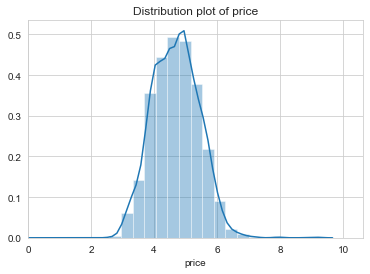

In [88]:
sns.distplot(np.log(data['price']+0.0001),bins=50)
plt.xlim(0)
plt.title('Distribution plot of price')

<font color='blue'>It seems the price has normal distribution</font>

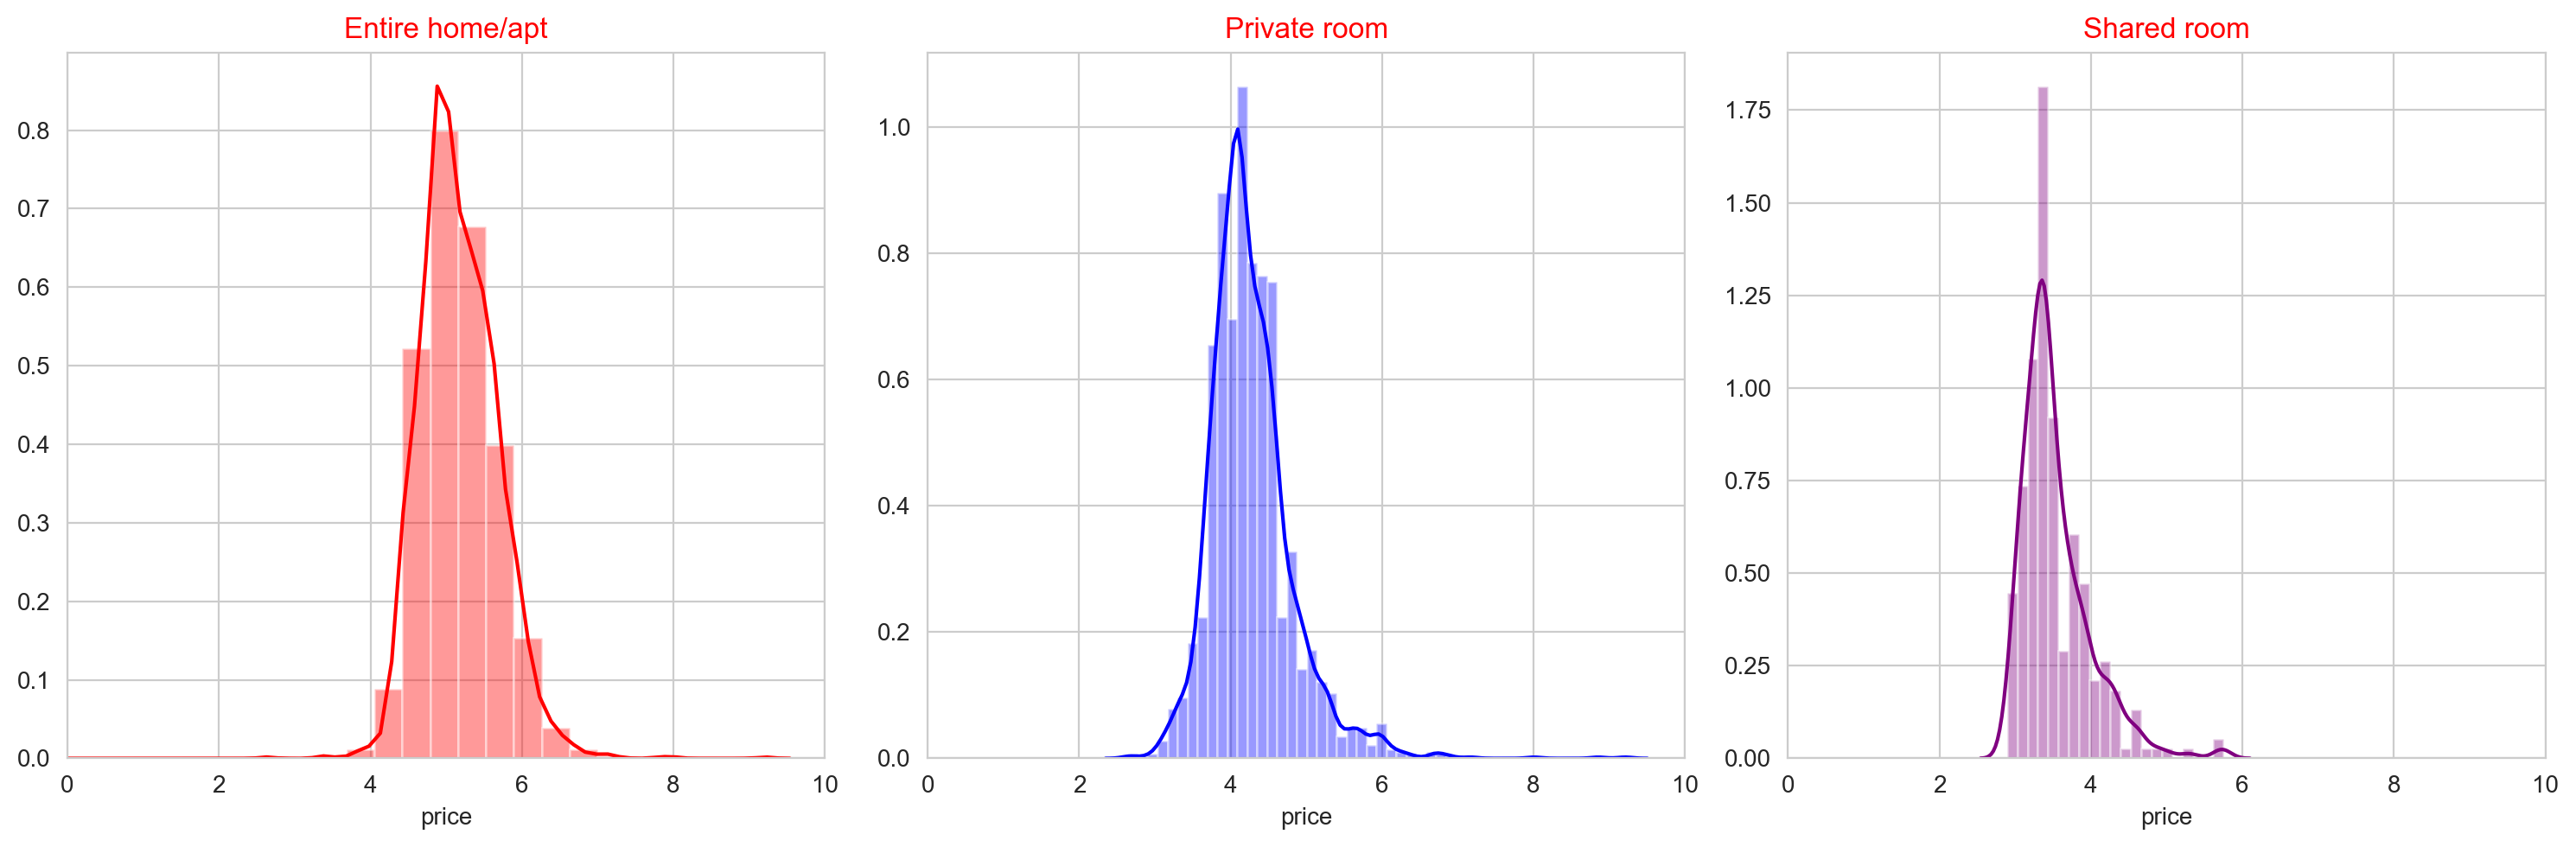

In [89]:
fig,ax = plt.subplots(1,3,figsize=(15,5),dpi=200)
roomType = ['Entire home/apt','Private room','Shared room']
color = ['red','blue','purple']
i=0
for item in roomType : 
    sns.distplot(np.log(combined_data[combined_data['room_type']==item]['price']+0.0001),color=color[i],label=item,ax=ax[i])
    ax[i].set_title(item,color='red')
    ax[i].set_xlim(0,10)
    i +=1
fig.tight_layout()  
plt.show()

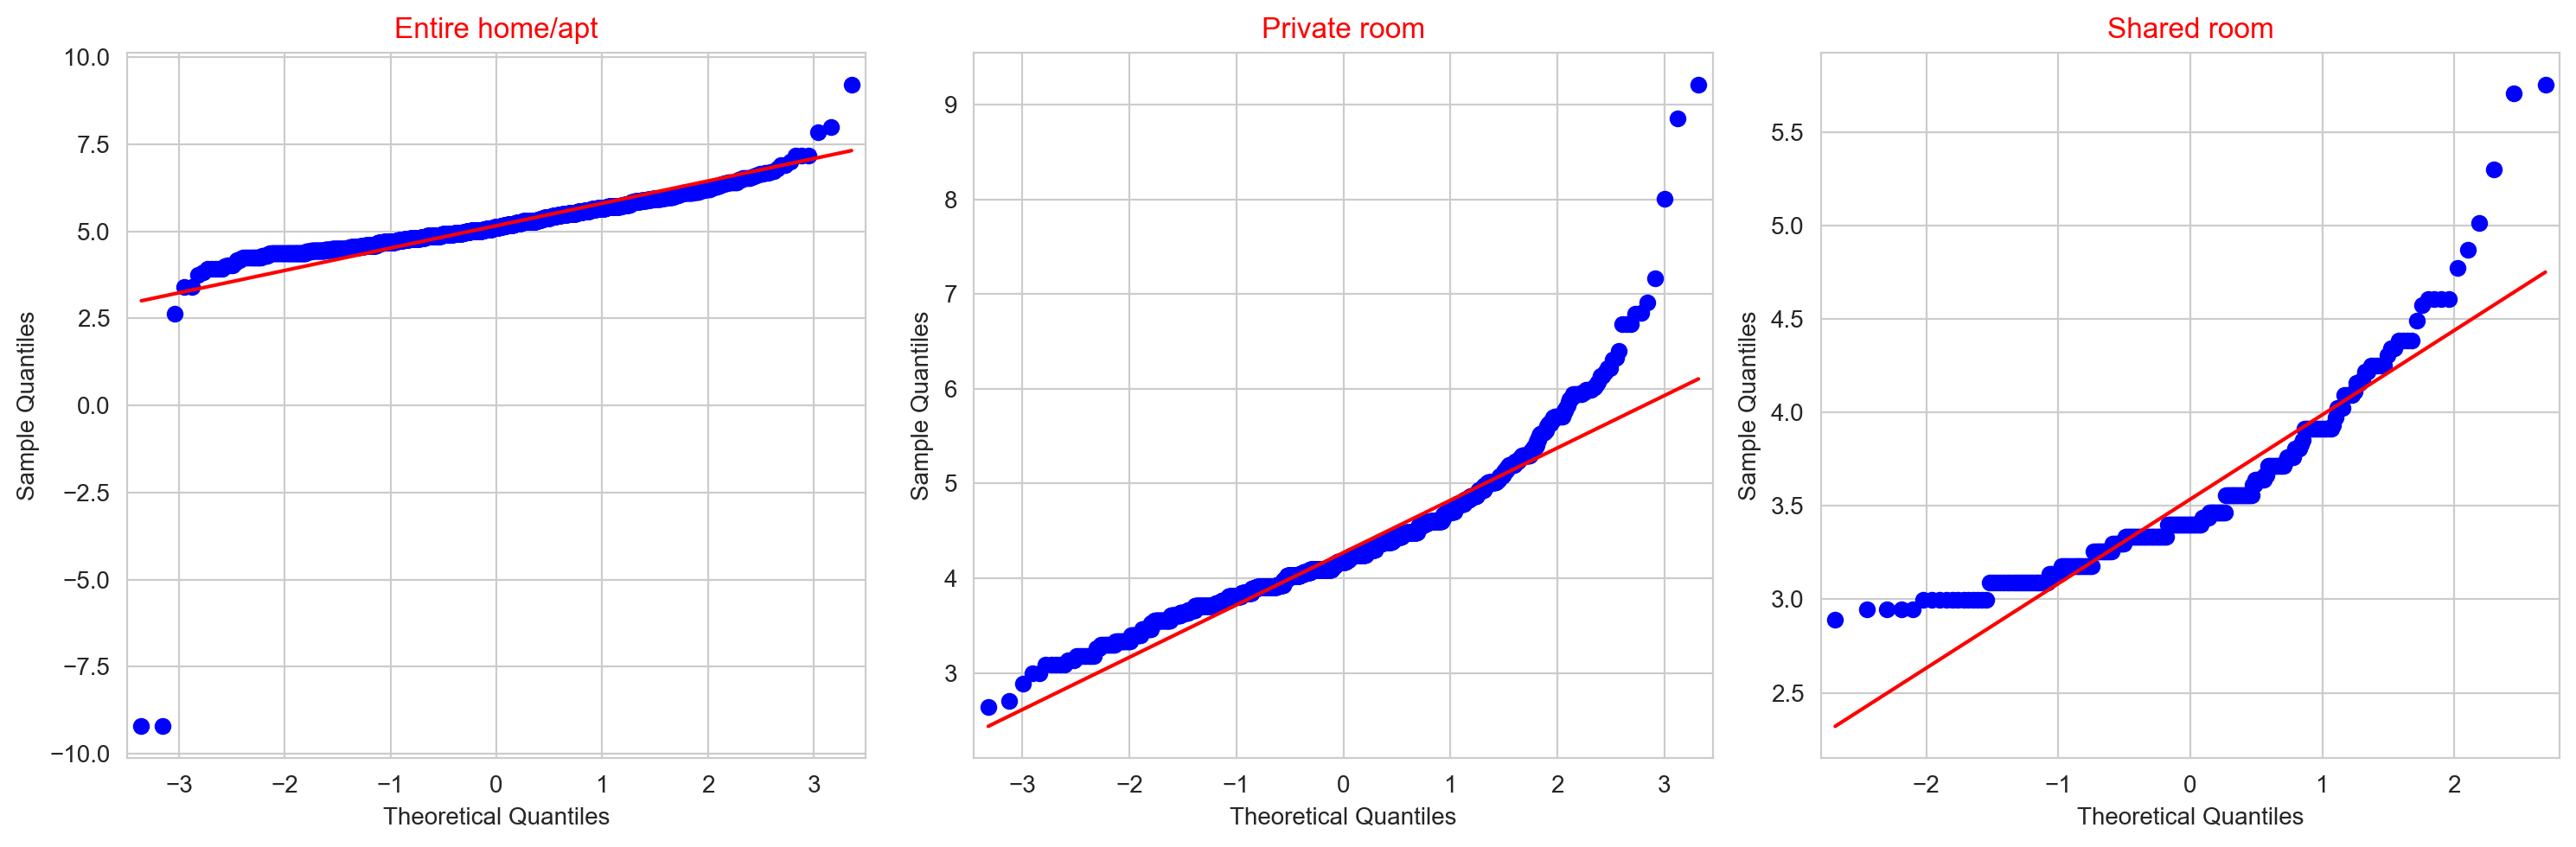

In [90]:
from statsmodels.graphics.gofplots import qqplot

fig,ax = plt.subplots(1,3,figsize=(15,5),dpi=200)
roomType = ['Entire home/apt','Private room','Shared room']
i=0
for item in roomType : 
    qqplot(np.log(combined_data[combined_data['room_type']==item]['price']+0.0001),line='s',ax=ax[i])
    ax[i].set_title(item,color='red')
    i +=1
fig.tight_layout()  
plt.show()

C:\Users\CitraKLN\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


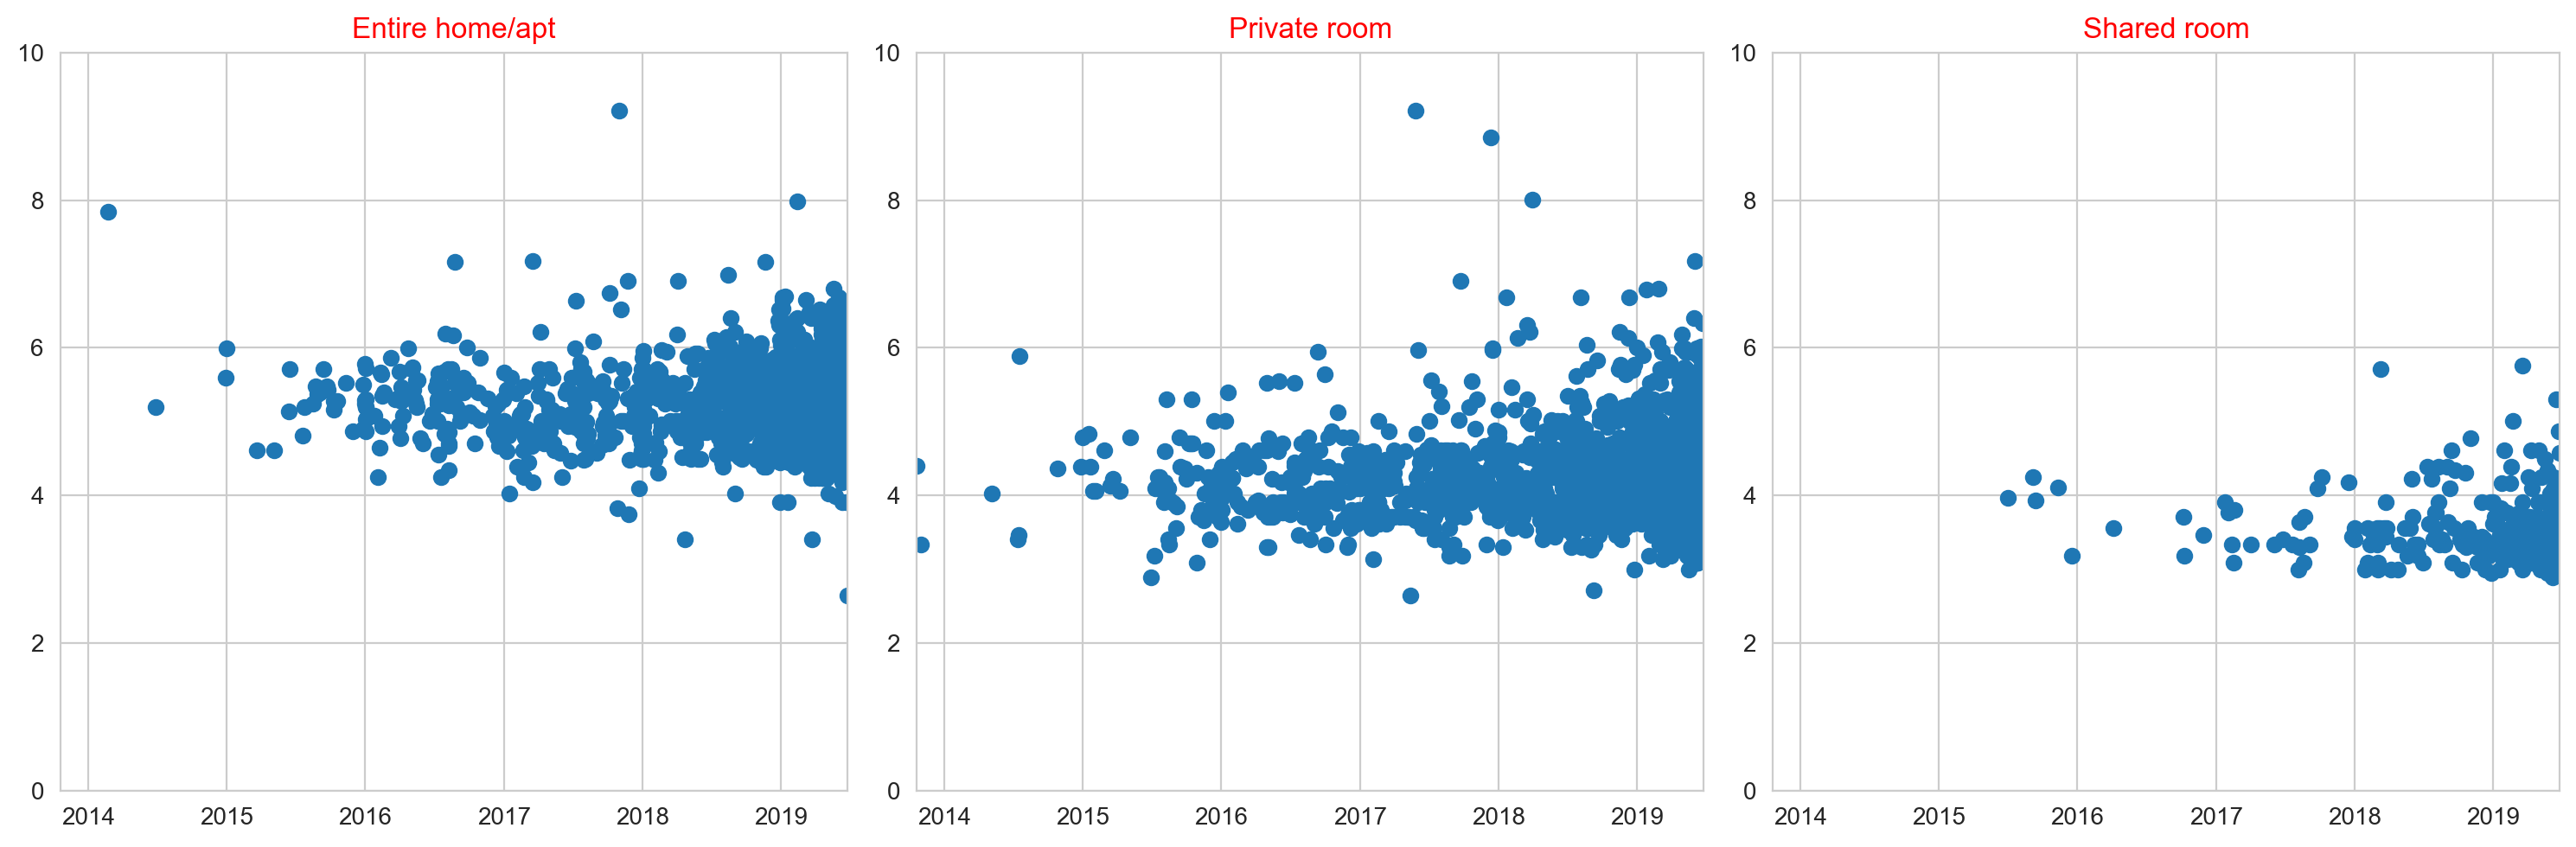

In [91]:
fig,ax = plt.subplots(1,3,figsize=(15,5),dpi=200)
roomType = ['Entire home/apt','Private room','Shared room']
i=0
for item in roomType : 
    ax[i].scatter(x=combined_data[combined_data['room_type']==item]['last_review'],y=np.log(combined_data[combined_data['room_type']==item]['price']+0.0001))
    ax[i].set_title(item,color='red')
    ax[i].set_ylim(0,10)
    ax[i].set_xlim(datetime.date(combined_data['last_review'].min()),datetime.date(combined_data['last_review'].max()))
    i +=1
fig.tight_layout()  
plt.show()

In [92]:
combined_data['day']= combined_data['last_review'].apply(lambda x: x.weekday())
combined_data['month']= combined_data['last_review'].apply(lambda x: x.month)
combined_data['year']= combined_data['last_review'].apply(lambda x: x.year)
combined_data['Weekend'] = combined_data['day'].map({
    0: 'Weekdays',
    1: 'Weekdays',
    2: 'Weekdays',
    3: 'Weekdays',
    4: 'Weekend',
    5: 'Weekend',
    6: 'Weekend',
})

<font color='blue'>Is there any correlation between price and day? </font>

<font color='blue'>Monday = 0, Tuesday = 1, Wednesday = 2, Thursday = 3, Friday = 4, Saturday = 5, Sunday = 6 </font>

(0, 6)

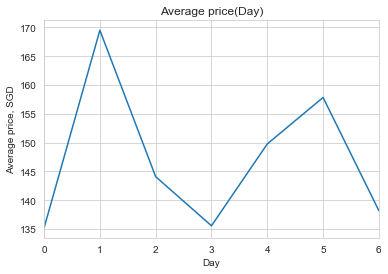

In [93]:
plt.plot(combined_data.groupby(['day'])['price'].mean())
plt.ylabel('Average price, SGD')
plt.xlabel('Day')
plt.title('Average price(Day)')
plt.xlim(0,6)

<font color='blue'>Is there any correlation between price and weekend? </font>

(0, 1)

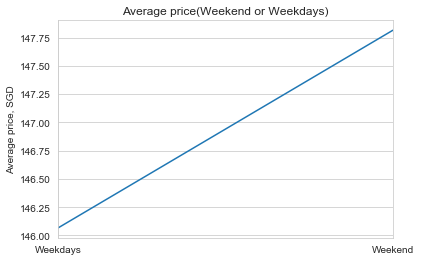

In [94]:
plt.plot(combined_data.groupby(['Weekend'])['price'].mean())
plt.ylabel('Average price, SGD')
plt.title('Average price(Weekend or Weekdays)')
plt.xlim(0,1)

<font color='blue'>Is there any correlation between price and year? </font>

Text(0.5, 1.0, 'Average price(Year)')

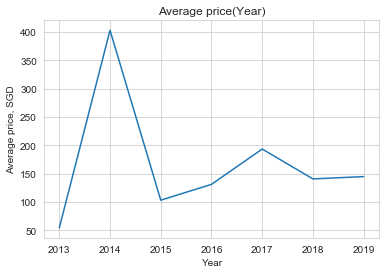

In [95]:
plt.plot(combined_data.groupby(['year'])['price'].mean())
plt.ylabel('Average price, SGD')
plt.xlabel('Year')
plt.title('Average price(Year)')


<font color='blue'>Is there any correlation between price and month? </font>

(1, 12)

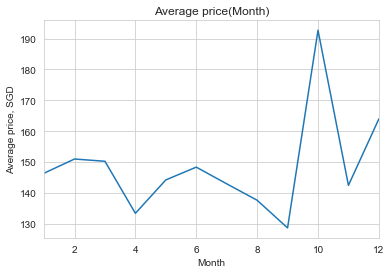

In [96]:
plt.plot(combined_data.groupby(['month'])['price'].mean())
plt.ylabel('Average price, SGD')
plt.xlabel('Month')
plt.title('Average price(Month)')
plt.xlim(1,12)

<font color='blue'>Is there any correlation between price and month in certain region? </font>

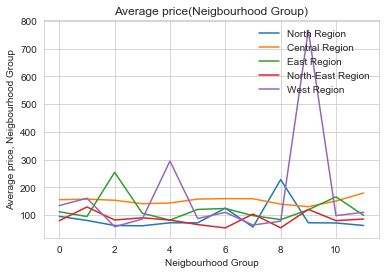

In [97]:
for item in combined_data['neighbourhood_group_cleansed'].unique() :
    plt.plot(combined_data[combined_data['neighbourhood_group_cleansed']==item].groupby(['neighbourhood_group_cleansed','month'])['price'].mean().values,label=item)
    plt.ylabel('Average price, Neigbourhood Group')
    plt.xlabel('Neigbourhood Group')
    plt.title('Average price(Neigbourhood Group)')
    plt.legend(loc='upper right',frameon=False)

<font color='blue'>Is there any correlation between price and month in certain year? </font>

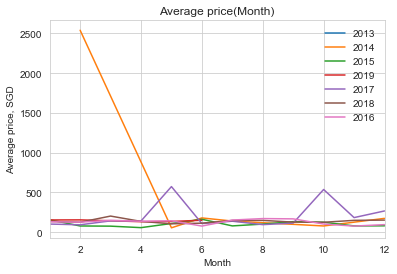

In [98]:
for item in combined_data['year'].unique() :
    plt.plot(combined_data[combined_data['year']==item].groupby(['month'])['price'].mean(),label=item)
    plt.ylabel('Average price, SGD')
    plt.xlabel('Month')
    plt.title('Average price(Month)')
    plt.legend(loc='upper right',frameon=False)
    plt.xlim(1,12)

<font color='blue'>It seems, there is outlier from the datas.</font>

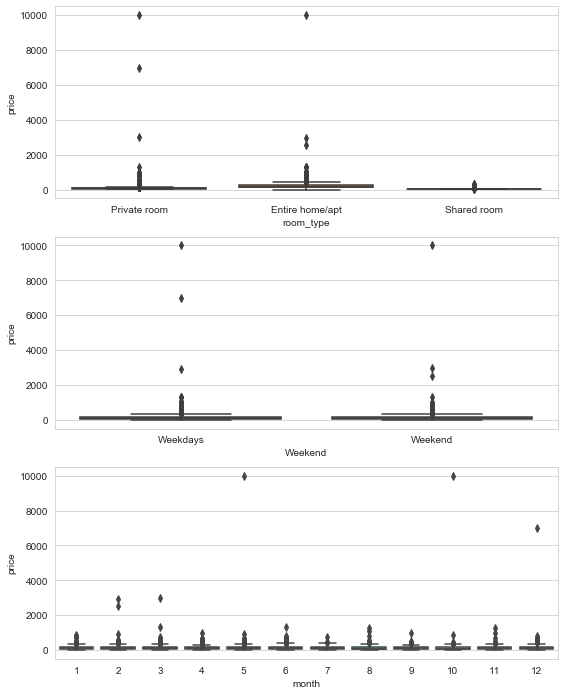

In [99]:
fig,ax = plt.subplots(3,1,figsize=(9,12))
i=0
for item in ['room_type','Weekend','month'] :
    sns.boxplot(x=combined_data[item],y=combined_data['price'],ax=ax[i])
    i+=1

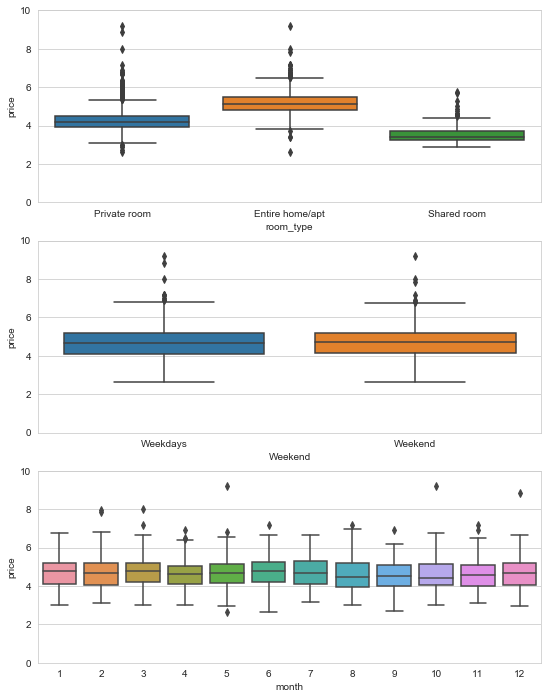

In [100]:
fig,ax = plt.subplots(3,1,figsize=(9,12))
i=0
for item in ['room_type','Weekend','month'] :
    sns.boxplot(x=combined_data[item],y=np.log(combined_data['price']+0.0001),ax=ax[i])
    ax[i].set_ylim(0,10,1)
    i+=1

<font color='blue'>From boxplot, the difference of price based on time is not significant.</font>

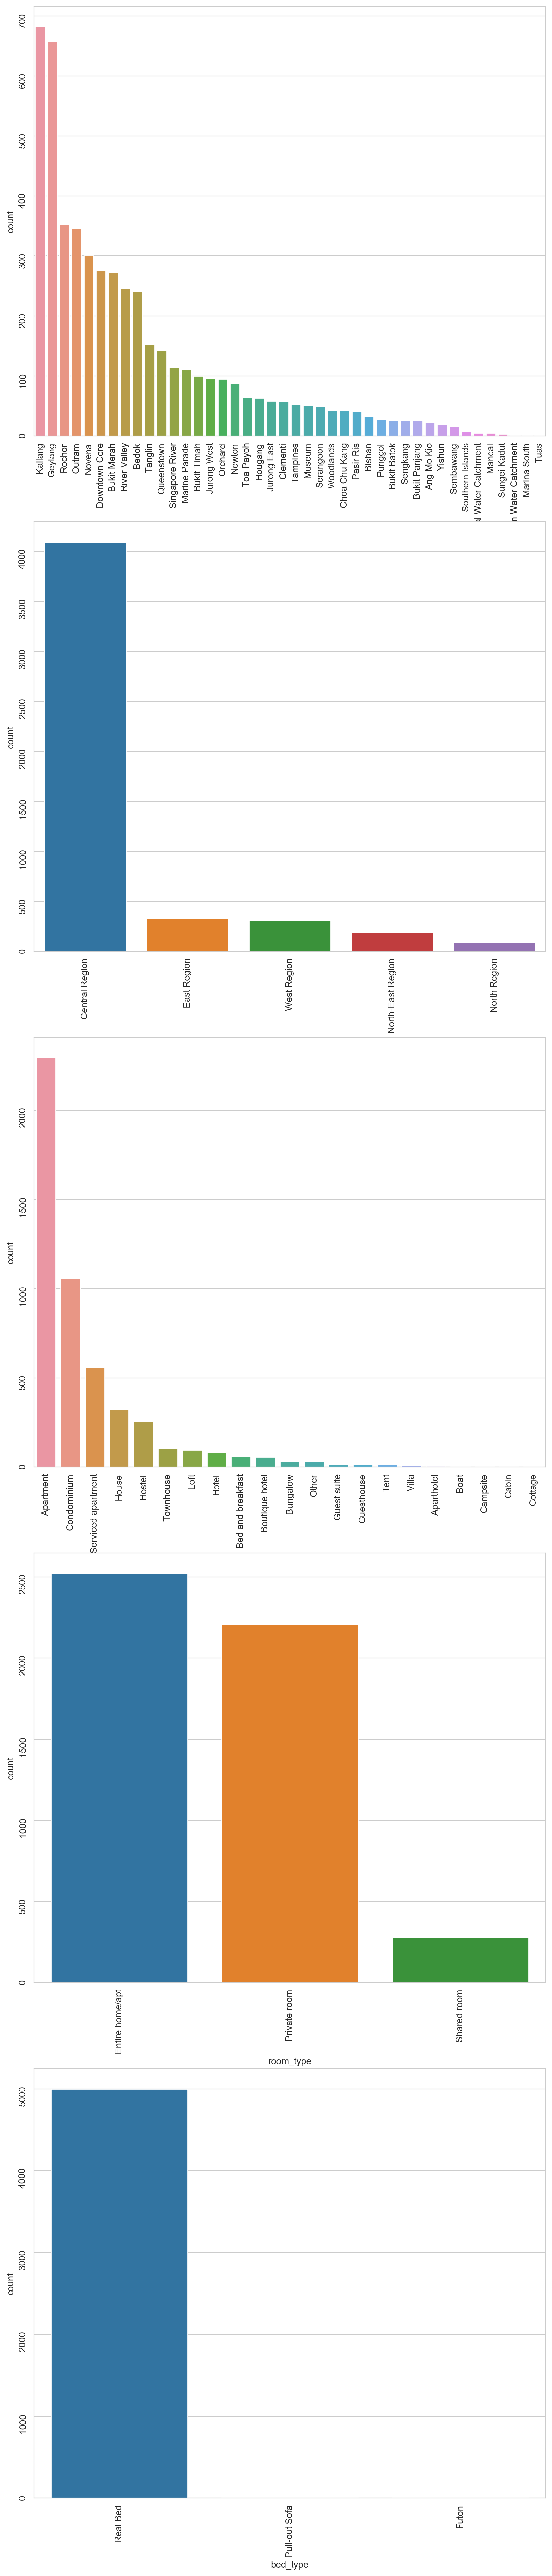

In [101]:
fig,ax = plt.subplots(5,1,figsize=(10,50),dpi=200)
i=0

for item in ['neighbourhood_cleansed','neighbourhood_group_cleansed','property_type','room_type','bed_type'] :
    sns.countplot(x = item,order = combined_data[item].value_counts().index,data = combined_data,ax=ax[i])
    ax[i].tick_params(labelrotation=90)
    i+=1


<font color='blue'> From the chart above, it can be seen that :
- The top 5 of neighborhood that have the most listings are Kallang, Geylang, Rochor,Outram, Novena
- The region that has the most listings is Central Region.
- Apartment is the most frequent property type that is avalaible in Airbnb Singapore.
- All of the listings have real bed in their property
</font>

<font color='blue'> Top 10 neighborhoods with the Highest Average Prices

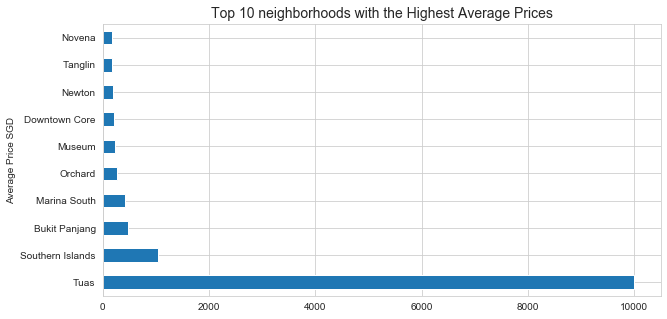

In [133]:
plt.figure(figsize = (10,5))
combined_data.groupby('neighbourhood_cleansed').price.mean().sort_values(ascending=False).iloc[:10].plot(kind='barh')
plt.title('Top 10 neighborhoods with the Highest Average Prices', fontsize=14)
plt.ylabel('Average Price SGD')
plt.show()

<font color='blue'> Top 10 neighborhoods with the Lowest Average Prices

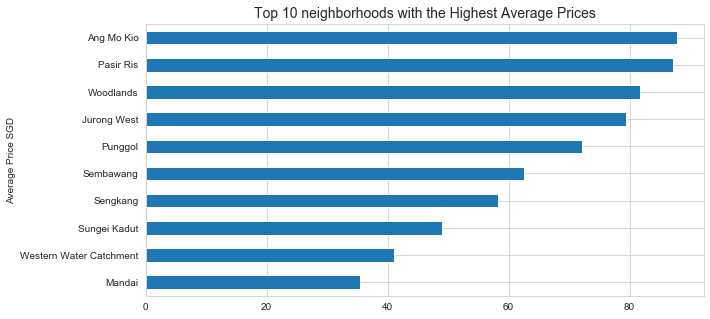

In [132]:
plt.figure(figsize = (10,5))
combined_data.groupby('neighbourhood_cleansed').price.mean().sort_values(ascending=True).iloc[:10].plot(kind='barh')
plt.title('Top 10 neighborhoods with the Highest Average Prices', fontsize=14)
plt.ylabel('Average Price SGD')
plt.show()

<font color='blue'>Did the host obey the law about allowed minimum nights in Airbnb Singapore? 
</font>

In [102]:
combined_data[combined_data['minimum_nights']<90]

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_url,host_name,host_since,host_location,host_about,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,id_2,date,reviewer_id,reviewer_name,comments,num_of_guest,num_of_visit,new_review_scores_rating,new_review_scores_accuracy,new_review_scores_cleanliness,new_review_scores_checkin,new_review_scores_communication,new_review_scores_location,new_review_scores_value,amenities_2,len_amenities,len_verifications,there_is_summary,there_is_description,category,day,month,year,Weekend
2,56334,COZICOMFORT,NaN,This is Room no. 1. USD700 per month On the fa...,This is Room no. 1. USD700 per month On the fa...,NaN,NaN,NaN,NaN,NaN,No smoking indoors. Please turn off lights/air...,266763,https://www.airbnb.com/users/show/266763,Francesca,2010-10-20,singapore,I am a private tutor by profession. My husband...,0,2.0,email phone facebook reviews jumio offline_gov...,1,0,"Singapore, Singapore",Woodlands,North Region,1.44246,103.79667,t,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",68,0.0,0.0,1,14,6,14,1680,t,30,60,90,365,0,2011-06-25,2015-10-01,98.0,10.0,10.0,10.0,10.0,8.0,9.0,0,t,t,2,0,2,0,0.21,56334,"[333890, 352553, 358719, 603762, 3423462, 3500...","[25/6/2011, 4/7/2011, 7/7/2011, 6/10/2011, 27/...","[699082, 729695, 91474, 949724, 4330782, 45921...","[Md Hadi Shafie, Camas, Jeanne, Hayley, Trini,...",[Fran is an excellent host who provided everyt...,20,20,94.10,9.60,9.49,9.74,9.73,8.66,8.98,TV CableTV Wifi Airconditioning Kitchen Petsli...,10,9,0,1,top 10%-20%,3,10,2015,Weekdays
3,71609,Ensuite Room (Room 1 & 2) near EXPO,For 3 (Website hidden by Airbnb) room 1&2 and ...,Landed Homestay Room for Rental. Between Simei...,For 3 (Website hidden by Airbnb) room 1&2 and ...,NaN,Incase there is some changes in the rooms allo...,NaN,NaN,NaN,Home Stay Rules House Rules & Check in Requir...,367042,https://www.airbnb.com/users/show/367042,Belinda,2011-01-29,Singapore,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,0,9.0,email phone reviews manual_offline work_email,1,1,"Singapore, Singapore",Tampines,East Region,1.34541,103.95712,t,Villa,Private room,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",200,271.0,54.0,4,27,1,1125,1,t,25,51,78,353,2,2011-12-19,2019-01-06,80.0,8.0,8.0,9.0,9.0,8.0,8.0,1,f,t,9,0,9,0,0.13,71609,"[793880, 1731810, 2162194, 2190615, 3221837, 1...","[19/12/2011, 17/7/2012, 1/9/2012, 4/9/2012, 2/...","[1456140, 1804182, 3113461, 1432123, 2759938, ...","[Max, Zac, Zahra, Helmut, Jack, Emily, Steven,...",[The rooms were clean and tidy. Beds very comf...,12,12,86.37,8.75,8.61,9.30,9.29,8.82,8.60,TV Wifi Airconditioning Kitchen Petsliveonthis...,26,5,1,1,top 90%-100%,6,1,2019,Weekend
4,71896,B&B Room 1 near Airport & EXPO,NaN,Vocational Stay Deluxe Bedroom in Singapore.(N...,Vocational Stay Deluxe Bedroom in Singapore.(N...,NaN,Incase there is some changes in the rooms allo...,NaN,NaN,NaN,Vocational Stay Rules - Do not excessively me...,367042,https://www.airbnb.com/users/show/367042,Belinda,2011-01-29,Singapore,Hi My n

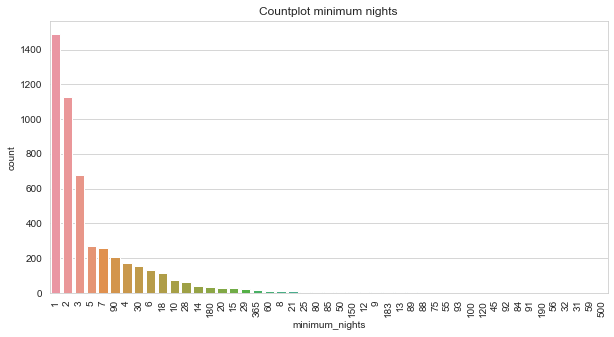

In [103]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'minimum_nights',order = combined_data['minimum_nights'].value_counts().index,data = combined_data)
plt.xticks(rotation=90)
plt.title('Countplot minimum nights')
plt.show()

In [104]:
print(f"Even though,there is minimum nights limitation in Singapore, {round(len(combined_data[combined_data['minimum_nights']<90])/len(combined_data)*100,2)} % of listings still ignore the regulation ")

Even though,there is minimum nights limitation in Singapore, 94.57 % of listings still ignore the regulation 


<font color='blue'>Even though,there is minimum nights limitation in Singapore, 94.57 % of listings still ignore the regulation 
</font>

# 3. MODELLING

<font color='blue'>The data will be modelled while ignoring the outlier</font>

#### i. Assume column 'amenities' does not have any effect on price prediction.

In [105]:
data_predict = pd.concat([combined_data[['id','guests_included','price','number_of_reviews_ltm','security_deposit','extra_people','cleaning_fee','minimum_nights','host_listings_count','new_review_scores_rating']],pd.get_dummies(combined_data[['neighbourhood_cleansed','property_type','room_type']],drop_first=True).reindex(data.index)],axis=1)
data_predict

,id,guests_included,price,number_of_reviews_ltm,security_deposit,extra_people,cleaning_fee,minimum_nights,host_listings_count,new_review_scores_rating,neighbourhood_cleansed_Bedok,neighbourhood_cleansed_Bishan,neighbourhood_cleansed_Bukit Batok,neighbourhood_cleansed_Bukit Merah,neighbourhood_cleansed_Bukit Panjang,neighbourhood_cleansed_Bukit Timah,neighbourhood_cleansed_Central Water Catchment,neighbourhood_cleansed_Choa Chu Kang,neighbourhood_cleansed_Clementi,neighbourhood_cleansed_Downtown Core,neighbourhood_cleansed_Geylang,neighbourhood_cleansed_Hougang,neighbourhood_cleansed_Jurong East,neighbourhood_cleansed_Jurong West,neighbourhood_cleansed_Kallang,neighbourhood_cleansed_Mandai,neighbourhood_cleansed_Marina South,neighbourhood_cleansed_Marine Parade,neighbourhood_cleansed_Museum,neighbourhood_cleansed_Newton,neighbourhood_cleansed_Novena,neighbourhood_cleansed_Orchard,neighbourhood_cleansed_Outram,neighbourhood_cleansed_Pasir Ris,neighbourhood_cleansed_Punggol,neighbourhood_cleansed_Queenstown,neighbourhood_cleansed_River Valley,neighbourhood_cleansed_Rochor,neighbourhood_cleansed_Sembawang,neighbourhood_cleansed_Sengkang,neighbourhood_cleansed_Serangoon,neighbourhood_cleansed_Singapore River,neighbourhood_cleansed_Southern Islands,neighbourhood_cleansed_Sungei Kadut,neighbourhood_cleansed_Tampines,neighbourhood_cleansed_Tanglin,neighbourhood_cleansed_Toa Payoh,neighbourhood_cleansed_Tuas,neighbourhood_cleansed_Western Water Catchment,neighbourhood_cleansed_Woodlands,neighbourhood_cleansed_Yishun,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Campsite,property_type_Condominium,property_type_Cottage,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room
0,49091,1,81,0,0.0,14,0.0,180,2.0,90.37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,50646,2,80,0,0.0,20,0.0,90,1.0,90.58,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,56334,1,68,0,0.0,14,0.0,6,2.0,94.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,71609,4,200,2,271.0,27,54.0,1,9.0,86.37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,71896,1,92,0,135.0,20,27.0,1,9.0,85.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,35788857,7,460,1,300.0,29,150.0,2,13.0,90.66,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5004,35788859,7,460,2,300.0,29,150.0,2,13.0,92.46,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5005,35894388,2,80,1,0.0,15,30.0,2,2.0,91.08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5006,35933544,1,50,1,0.0,0,0.0,1,4.0,91.08,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
abs(data_predict.corr()['price']).sort_values(ascending=False).head(20)

price                                      1.000000
neighbourhood_cleansed_Tuas                0.543235
guests_included                            0.228067
room_type_Private room                     0.183537
cleaning_fee                               0.142897
extra_people                               0.130586
neighbourhood_cleansed_Southern Islands    0.130309
security_deposit                           0.116794
room_type_Shared room                      0.101953
neighbourhood_cleansed_Bukit Panjang       0.091210
property_type_Hostel                       0.080878
property_type_Serviced apartment           0.078057
neighbourhood_cleansed_Downtown Core       0.066502
neighbourhood_cleansed_Orchard             0.061725
property_type_Condominium                  0.047664
property_type_House                        0.045431
id                                         0.044774
new_review_scores_rating                   0.043795
neighbourhood_cleansed_Jurong West         0.036824
minimum_nigh

In [107]:
X = data_predict.drop(['price','id'],axis=1)
y = data_predict['price']


In [108]:
from sklearn.model_selection import KFold

In [109]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [110]:
def regression_model(n_cv):
    RAND_STATE = 101
    score = []
    model_name = ['Lasso','Ridge','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor']
    models = [Lasso,Ridge,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,XGBRegressor]
    for item in models:
        rmse = []
        mae = []
        r2_score_test = []
        r2_score_train =[]
        kf = KFold(n_splits=n_cv,shuffle=True)
        for train_index , test_index in kf.split(X,y):
            X_train,X_test,y_train,y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
            model = item(random_state=RAND_STATE)
            model.fit(X_train,y_train)
            prediction = model.predict(X_test)
            prediction_train = model.predict(X_train)
            mae.append(round(mean_absolute_error(y_test,prediction),2))
            rmse.append(round(np.sqrt(mean_squared_error(y_test,prediction)),2))
            r2_score_train.append(round(r2_score(y_train,prediction_train),2))
            r2_score_test.append(round(r2_score(y_test,prediction),2))

        temp = [
            sum(mae)/n_cv,
            sum(rmse)/n_cv,
            sum(r2_score_train)/n_cv,
            sum(r2_score_test)/n_cv
        ]
        score.append(temp)
    
    # for LinearRegressor
    rmse = []
    mae = []
    r2_score_test = []
    r2_score_train =[]
    kf = KFold(n_splits=n_cv,shuffle=True)
    for train_index , test_index in kf.split(X,y):
        X_train,X_test,y_train,y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
        lin = LinearRegression()
        lin.fit(X_train,y_train)
        prediction = lin.predict(X_test)
        prediction_train = lin.predict(X_train)
        mae.append(round(mean_absolute_error(y_test,prediction),2))
        rmse.append(round(np.sqrt(mean_squared_error(y_test,prediction)),2))
        r2_score_train.append(round(r2_score(y_train,prediction_train),2))
        r2_score_test.append(round(r2_score(y_test,prediction),2))

    temp = [
        sum(mae)/n_cv,
        sum(rmse)/n_cv,
        sum(r2_score_train)/n_cv,
        sum(r2_score_test)/n_cv
    ]
    score.append(temp)
    
    model_name.append('LinearRegression')
    
    # for AdaBoostRegressor
    rmse = []
    mae = []
    r2_score_test = []
    r2_score_train =[]
    kf = KFold(n_splits=n_cv,shuffle=True)
    for train_index , test_index in kf.split(X,y):
        X_train,X_test,y_train,y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
        ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=RAND_STATE),random_state=RAND_STATE)
        ada.fit(X_train,y_train)
        prediction = ada.predict(X_test)
        prediction_train = ada.predict(X_train)
        mae.append(round(mean_absolute_error(y_test,prediction),2))
        rmse.append(round(np.sqrt(mean_squared_error(y_test,prediction)),2))
        r2_score_train.append(round(r2_score(y_train,prediction_train),2))
        r2_score_test.append(round(r2_score(y_test,prediction),2))

    temp = [
        sum(mae)/n_cv,
        sum(rmse)/n_cv,
        sum(r2_score_train)/n_cv,
        sum(r2_score_test)/n_cv
    ]
    score.append(temp)
    
    model_name.append('AdaBoostRegressor')
    
    return pd.DataFrame(score,columns=['MAE_test','RMSE_test','R2_Score_Train','R2_Score_Test'],index=model_name)

In [111]:
regression_model(5)

,MAE_test,RMSE_test,R2_Score_Train,R2_Score_Test
Lasso,58.036,210.710,0.348,0.218
Ridge,56.774,205.876,0.344,0.230
DecisionTreeRegressor,64.798,353.606,1.000,-1.746
RandomForestRegressor,49.634,272.718,0.842,-0.782
GradientBoostingRegressor,54.674,251.996,0.676,-0.136
XGBRegressor,54.340,305.826,0.978,-2.506
LinearRegression,55.828,208.070,0.414,0.210
AdaBoostRegressor,40.432,198.012,1.000,0.294


In [112]:
regression_model(10)

,MAE_test,RMSE_test,R2_Score_Train,R2_Score_Test
Lasso,57.792,162.381,0.342,0.336
Ridge,56.331,179.639,0.356,0.312
DecisionTreeRegressor,58.286,293.236,1.000,-3.803
RandomForestRegressor,49.419,233.516,0.840,-0.843
GradientBoostingRegressor,52.399,186.953,0.646,0.192
XGBRegressor,53.940,257.813,0.978,-2.607
LinearRegression,55.661,179.950,0.414,0.280
AdaBoostRegressor,44.652,248.481,1.000,-2.496


#### ii. Assume column 'amenities' has effect on price prediction.

#### ii.a. Use all amenities

<font color='blue'>Make amenities as features by using CountVectorizer</font>

In [113]:
combined_data['amenities']

0       {TV,"Cable TV",Internet,Wifi,"Air conditioning...
1       {TV,"Cable TV",Internet,Wifi,"Air conditioning...
2       {TV,"Cable TV",Wifi,"Air conditioning",Kitchen...
3       {TV,Wifi,"Air conditioning",Kitchen,"Pets live...
4       {TV,Internet,Wifi,"Air conditioning",Kitchen,"...
                              ...                        
5003    {TV,Wifi,"Air conditioning",Pool,Kitchen,"Free...
5004    {TV,Wifi,"Air conditioning",Pool,Kitchen,"Free...
5005    {TV,Wifi,"Air conditioning",Pool,Kitchen,Gym,E...
5006    {TV,Wifi,"Air conditioning",Pool,Kitchen,Gym,E...
5007    {TV,Wifi,"Air conditioning",Pool,Kitchen,"Smok...
Name: amenities, Length: 5008, dtype: object

In [114]:
combined_data['amenities_2'] = combined_data['amenities'].apply(lambda x: x.replace('"','').replace('{',r'').replace('}',r'').replace(' ','').replace(',',' '))

In [115]:
def cv_df(dataframe,col):
    from sklearn.feature_extraction.text import CountVectorizer
    cv = CountVectorizer()
    cv_amenities = cv.fit_transform(dataframe[col])
    cv_df = pd.DataFrame(cv_amenities.todense(),columns=cv.get_feature_names())
    return cv_df

In [116]:
cv_amenities = cv_df(combined_data,'amenities_2')

In [134]:
cv_amenities

,24,accessible,airconditioning,airpurifier,babybath,babymonitor,babysitterrecommendations,bathtub,bathtubwithbathchair,bbqgrill,beachessentials,beachfront,bedlinens,breakfast,buildingstaff,buzzer,cabletv,carbonmonoxidedetector,cat,changingtable,childrenâ,cleaningbeforecheckout,coffeemaker,cookingbasics,crib,darkeningshades,disabledparkingspot,dishesandsilverware,dishwasher,dog,doorman,dryer,electricprofilingbed,elevator,en,essentials,ethernetconnection,evcharger,extrapillowsandblankets,extraspacearoundbed,family,fireextinguisher,fireplaceguards,firmmattress,firstaidkit,fixedgrabbarsforshower,fixedgrabbarsfortoilet,flatpathtoguestentrance,freeparkingonpremises,freestreetparking,...,other,otherpet,outletcovers,oven,packâ,paidparkingoffpremises,paidparkingonpremises,patioorbalcony,petsallowed,petsliveonthisproperty,pocketwifi,pool,poolwithpoolhoist,privatebathroom,privateentrance,privatelivingroom,refrigerator,roll,room,safetycard,sbooksandtoys,sdinnerware,selfcheck,shampoo,showerchair,singlelevelhome,smartlock,smokedetector,smokingallowed,stairgates,stove,suitableforevents,tablecornerguards,toilet,translationmissing,travelcrib,tv,washer,waterfront,well,wheelchairaccessible,wideclearancetoshower,widedoorwaytoguestbathroom,wideentrance,wideentranceforguests,wideentryway,widehallways,wifi,windowguards,wirelessintercom
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
5004,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
5005,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
5006,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0


In [117]:
data_predict_2 = pd.concat([combined_data[['id','guests_included','price','number_of_reviews_ltm','security_deposit','extra_people','cleaning_fee','minimum_nights','host_listings_count','new_review_scores_rating']],pd.get_dummies(combined_data[['neighbourhood_cleansed','property_type','room_type']],drop_first=True).reindex(data.index),cv_amenities],axis=1)
data_predict_2

,id,guests_included,price,number_of_reviews_ltm,security_deposit,extra_people,cleaning_fee,minimum_nights,host_listings_count,new_review_scores_rating,neighbourhood_cleansed_Bedok,neighbourhood_cleansed_Bishan,neighbourhood_cleansed_Bukit Batok,neighbourhood_cleansed_Bukit Merah,neighbourhood_cleansed_Bukit Panjang,neighbourhood_cleansed_Bukit Timah,neighbourhood_cleansed_Central Water Catchment,neighbourhood_cleansed_Choa Chu Kang,neighbourhood_cleansed_Clementi,neighbourhood_cleansed_Downtown Core,neighbourhood_cleansed_Geylang,neighbourhood_cleansed_Hougang,neighbourhood_cleansed_Jurong East,neighbourhood_cleansed_Jurong West,neighbourhood_cleansed_Kallang,neighbourhood_cleansed_Mandai,neighbourhood_cleansed_Marina South,neighbourhood_cleansed_Marine Parade,neighbourhood_cleansed_Museum,neighbourhood_cleansed_Newton,neighbourhood_cleansed_Novena,neighbourhood_cleansed_Orchard,neighbourhood_cleansed_Outram,neighbourhood_cleansed_Pasir Ris,neighbourhood_cleansed_Punggol,neighbourhood_cleansed_Queenstown,neighbourhood_cleansed_River Valley,neighbourhood_cleansed_Rochor,neighbourhood_cleansed_Sembawang,neighbourhood_cleansed_Sengkang,neighbourhood_cleansed_Serangoon,neighbourhood_cleansed_Singapore River,neighbourhood_cleansed_Southern Islands,neighbourhood_cleansed_Sungei Kadut,neighbourhood_cleansed_Tampines,neighbourhood_cleansed_Tanglin,neighbourhood_cleansed_Toa Payoh,neighbourhood_cleansed_Tuas,neighbourhood_cleansed_Western Water Catchment,neighbourhood_cleansed_Woodlands,...,other,otherpet,outletcovers,oven,packâ,paidparkingoffpremises,paidparkingonpremises,patioorbalcony,petsallowed,petsliveonthisproperty,pocketwifi,pool,poolwithpoolhoist,privatebathroom,privateentrance,privatelivingroom,refrigerator,roll,room,safetycard,sbooksandtoys,sdinnerware,selfcheck,shampoo,showerchair,singlelevelhome,smartlock,smokedetector,smokingallowed,stairgates,stove,suitableforevents,tablecornerguards,toilet,translationmissing,travelcrib,tv,washer,waterfront,well,wheelchairaccessible,wideclearancetoshower,widedoorwaytoguestbathroom,wideentrance,wideentranceforguests,wideentryway,widehallways,wifi,windowguards,wirelessintercom
0,49091,1,81,0,0.0,14,0.0,180,2.0,90.37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,50646,2,80,0,0.0,20,0.0,90,1.0,90.58,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
2,56334,1,68,0,0.0,14,0.0,6,2.0,94.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
3,71609,4,200,2,271.0,27,54.0,1,9.0,86.37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
4,71896,1,92,0,135.0,20,27.0,1,9.0,85.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,35788857,7,460,1,300.0,29,150.0,2,13.0,90.66,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
5004,35788859,7,460,2,300.0,29,150.0,2,13.0,92.46,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [118]:
data_predict_2.corr()['price'].sort_values(ascending=False).head(50)

price                                      1.000000
neighbourhood_cleansed_Tuas                0.543235
guests_included                            0.228067
cleaning_fee                               0.142897
extra_people                               0.130586
neighbourhood_cleansed_Southern Islands    0.130309
pool                                       0.122926
security_deposit                           0.116794
tv                                         0.109787
elevator                                   0.108859
gym                                        0.107057
hairdryer                                  0.094570
hottub                                     0.093253
neighbourhood_cleansed_Bukit Panjang       0.091210
bathtub                                    0.088486
freeparkingonpremises                      0.086066
pocketwifi                                 0.082939
property_type_Serviced apartment           0.078057
crib                                       0.077785
petsallowed 

In [119]:
X = data_predict_2.drop(['price','id'],axis=1)
y = data_predict_2['price']

In [120]:
regression_model(5)

,MAE_test,RMSE_test,R2_Score_Train,R2_Score_Test
Lasso,57.622,225.382,0.370,0.166
Ridge,63.694,229.742,0.380,0.130
DecisionTreeRegressor,60.256,301.764,1.000,-1.260
RandomForestRegressor,45.756,237.088,0.862,-0.404
GradientBoostingRegressor,51.700,231.916,0.826,0.050
XGBRegressor,46.724,208.994,0.988,0.124
LinearRegression,62.840,227.914,0.454,0.110
AdaBoostRegressor,41.004,229.316,1.000,0.110


In [121]:
regression_model(10)

,MAE_test,RMSE_test,R2_Score_Train,R2_Score_Test
Lasso,57.253,193.470,0.351,0.272
Ridge,63.238,199.655,0.375,0.228
DecisionTreeRegressor,59.292,337.136,1.000,-5.855
RandomForestRegressor,47.770,254.981,0.855,-1.213
GradientBoostingRegressor,52.924,209.313,0.815,0.083
XGBRegressor,47.484,191.589,0.989,0.224
LinearRegression,62.149,204.668,0.451,0.217
AdaBoostRegressor,37.597,187.249,1.000,0.393


#### ii.b. Use chosen amenities

In [122]:
data_predict_3 = pd.concat([combined_data[['id','guests_included','price','number_of_reviews_ltm','security_deposit','extra_people','cleaning_fee','minimum_nights','host_listings_count','new_review_scores_rating']],pd.get_dummies(combined_data[['neighbourhood_cleansed','property_type','room_type']],drop_first=True).reindex(data.index),cv_amenities[['wifi','elevator','tv','kitchen','hairdryer','pool','wheelchairaccessible','longtermstaysallowed']]],axis=1)
data_predict_3

,id,guests_included,price,number_of_reviews_ltm,security_deposit,extra_people,cleaning_fee,minimum_nights,host_listings_count,new_review_scores_rating,neighbourhood_cleansed_Bedok,neighbourhood_cleansed_Bishan,neighbourhood_cleansed_Bukit Batok,neighbourhood_cleansed_Bukit Merah,neighbourhood_cleansed_Bukit Panjang,neighbourhood_cleansed_Bukit Timah,neighbourhood_cleansed_Central Water Catchment,neighbourhood_cleansed_Choa Chu Kang,neighbourhood_cleansed_Clementi,neighbourhood_cleansed_Downtown Core,neighbourhood_cleansed_Geylang,neighbourhood_cleansed_Hougang,neighbourhood_cleansed_Jurong East,neighbourhood_cleansed_Jurong West,neighbourhood_cleansed_Kallang,neighbourhood_cleansed_Mandai,neighbourhood_cleansed_Marina South,neighbourhood_cleansed_Marine Parade,neighbourhood_cleansed_Museum,neighbourhood_cleansed_Newton,neighbourhood_cleansed_Novena,neighbourhood_cleansed_Orchard,neighbourhood_cleansed_Outram,neighbourhood_cleansed_Pasir Ris,neighbourhood_cleansed_Punggol,neighbourhood_cleansed_Queenstown,neighbourhood_cleansed_River Valley,neighbourhood_cleansed_Rochor,neighbourhood_cleansed_Sembawang,neighbourhood_cleansed_Sengkang,neighbourhood_cleansed_Serangoon,neighbourhood_cleansed_Singapore River,neighbourhood_cleansed_Southern Islands,neighbourhood_cleansed_Sungei Kadut,neighbourhood_cleansed_Tampines,neighbourhood_cleansed_Tanglin,neighbourhood_cleansed_Toa Payoh,neighbourhood_cleansed_Tuas,neighbourhood_cleansed_Western Water Catchment,neighbourhood_cleansed_Woodlands,neighbourhood_cleansed_Yishun,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Campsite,property_type_Condominium,property_type_Cottage,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,wifi,elevator,tv,kitchen,hairdryer,pool,wheelchairaccessible,longtermstaysallowed
0,49091,1,81,0,0.0,14,0.0,180,2.0,90.37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0
1,50646,2,80,0,0.0,20,0.0,90,1.0,90.58,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,0,0
2,56334,1,68,0,0.0,14,0.0,6,2.0,94.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0
3,71609,4,200,2,271.0,27,54.0,1,9.0,86.37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1,0,0,1
4,71896,1,92,0,135.0,20,27.0,1,9.0,85.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,35788857,7,460,1,300.0,29,150.0,2,13.0,90.66,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0
5004,35788859,7,460,2,300.0,29,150.0,2,13.0,92.46,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0
5005,35894388,2,80,1,0.0,15,30.0,2,2.0,91.08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,0,0
5006,35933544,1,50,1,0.0,0,0.0,1,4.0,91.08,0,0,0,0,0,0,0,0,0,0,0,0

In [123]:
data_predict_3.corr()['price'].sort_values(ascending=False).head(50)

price                                             1.000000
neighbourhood_cleansed_Tuas                       0.543235
guests_included                                   0.228067
cleaning_fee                                      0.142897
extra_people                                      0.130586
neighbourhood_cleansed_Southern Islands           0.130309
pool                                              0.122926
security_deposit                                  0.116794
tv                                                0.109787
elevator                                          0.108859
hairdryer                                         0.094570
neighbourhood_cleansed_Bukit Panjang              0.091210
property_type_Serviced apartment                  0.078057
kitchen                                           0.075135
neighbourhood_cleansed_Downtown Core              0.066502
wheelchairaccessible                              0.063731
neighbourhood_cleansed_Orchard                    0.0617

In [124]:
X = data_predict_3.drop(['price','id'],axis=1)
y = data_predict_3['price']

In [125]:
regression_model(5)

,MAE_test,RMSE_test,R2_Score_Train,R2_Score_Test
Lasso,57.078,208.594,0.354,0.230
Ridge,57.662,225.596,0.352,0.148
DecisionTreeRegressor,60.110,346.226,1.000,-3.480
RandomForestRegressor,46.540,246.298,0.844,-0.104
GradientBoostingRegressor,56.002,253.566,0.752,-0.728
XGBRegressor,48.968,265.170,0.986,-0.630
LinearRegression,57.492,228.552,0.426,0.114
AdaBoostRegressor,40.122,222.600,1.000,0.204


In [126]:
regression_model(10)

,MAE_test,RMSE_test,R2_Score_Train,R2_Score_Test
Lasso,57.404,198.654,0.340,0.253
Ridge,56.904,201.882,0.354,0.225
DecisionTreeRegressor,61.023,312.479,1.000,-2.189
RandomForestRegressor,46.010,211.476,0.854,0.049
GradientBoostingRegressor,54.474,235.575,0.696,-0.986
XGBRegressor,50.489,227.176,0.982,-0.362
LinearRegression,56.725,199.557,0.426,0.257
AdaBoostRegressor,42.816,226.344,1.000,0.082
